In [1]:
import os
import zarr
from config import DATA_DIR, TARGET_DIR
import numpy as np

def process_experiment_runs(base_dir):
    # Dictionnaire pour stocker les résultats par TS
    data_results = {}

    # Parcourir tous les sous-dossiers dans ExperimentRuns
    for ts_folder in os.listdir(base_dir):
        ts_path = os.path.join(base_dir, ts_folder)

        # Vérifier si le dossier contient un fichier Zarr
        zarr_path = os.path.join(ts_path, "VoxelSpacing10.000/denoised.zarr")
        if os.path.exists(zarr_path):
            print(f"Traitement de {ts_folder}...")

            # Charger le groupe Zarr
            zgroup = zarr.open_group(zarr_path, mode='r')
            
            # Visualiser l'arborescence
            print(f"Arborescence pour {ts_folder}:")
            print(zgroup.tree())
            
            # Dictionnaire pour stocker les données de ce TS
            ts_data = {}

            # Parcourir les sous-groupes (0, 1, 2, ...)
            for subgroup_key in zgroup.keys():
                subgroup = zgroup[subgroup_key]

                # Extraire les métadonnées et les données
                ts_data[subgroup_key] = {
                    "attrs": dict(subgroup.attrs),  # Convertir les métadonnées en dictionnaire
                    "info": subgroup.info,
                    "data": subgroup[:],  # Charger les données complètes
                }

            # Ajouter les données au dictionnaire global
            data_results[ts_folder] = ts_data

    return data_results




# Traiter les tomogrammes
all_data = process_experiment_runs(DATA_DIR)

# Sauvegarder les résultats ou continuer l'analyse
print("Traitement terminé. Résumé des données extraites :")
for ts_name, ts_content in all_data.items():
    print(f"- {ts_name}: {len(ts_content)} sous-groupes traités.")


Traitement de TS_5_4...
Arborescence pour TS_5_4:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_69_2...
Arborescence pour TS_69_2:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_6_4...
Arborescence pour TS_6_4:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_6_6...
Arborescence pour TS_6_6:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_73_6...
Arborescence pour TS_73_6:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_86_3...
Arborescence pour TS_86_3:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_99_9...
Arborescence pour TS_99_9:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158)

In [2]:
all_data.keys()

dict_keys(['TS_5_4', 'TS_69_2', 'TS_6_4', 'TS_6_6', 'TS_73_6', 'TS_86_3', 'TS_99_9'])

In [3]:
all_data['TS_5_4'].keys()

dict_keys(['0', '1', '2'])

In [4]:
all_data['TS_5_4']['0']['data']

array([[[-1.0589503e-08,  1.5891337e-06,  8.6985551e-07, ...,
          1.2546960e-06,  2.7620436e-07, -9.6554413e-07],
        [-4.9929668e-07,  2.7837150e-06,  3.0947467e-06, ...,
          2.8480628e-07, -8.9094044e-08, -1.4401762e-06],
        [-1.0891541e-06,  1.5427659e-06,  1.4145429e-06, ...,
          1.8715558e-07, -5.1522932e-07, -1.3863324e-06],
        ...,
        [-6.9335545e-07,  3.5703101e-07,  8.0947825e-07, ...,
         -1.4218481e-06, -9.1161525e-08, -1.2515941e-06],
        [-4.2106151e-07,  2.2317974e-07,  8.7088415e-07, ...,
         -2.5142091e-07,  4.4749459e-07,  3.5609071e-07],
        [-2.6293966e-07, -2.7313038e-07, -5.7560578e-07, ...,
          7.9891106e-07,  4.1823807e-07,  1.9056137e-07]],

       [[-8.9148364e-07,  1.9433514e-06,  4.5870165e-06, ...,
          2.9067949e-06,  8.9173477e-07, -1.3247987e-06],
        [-1.5419438e-06,  3.6550177e-06,  8.8251591e-06, ...,
         -5.1537575e-07, -6.8805934e-07, -1.8712533e-06],
        [-2.2441336e-06, 

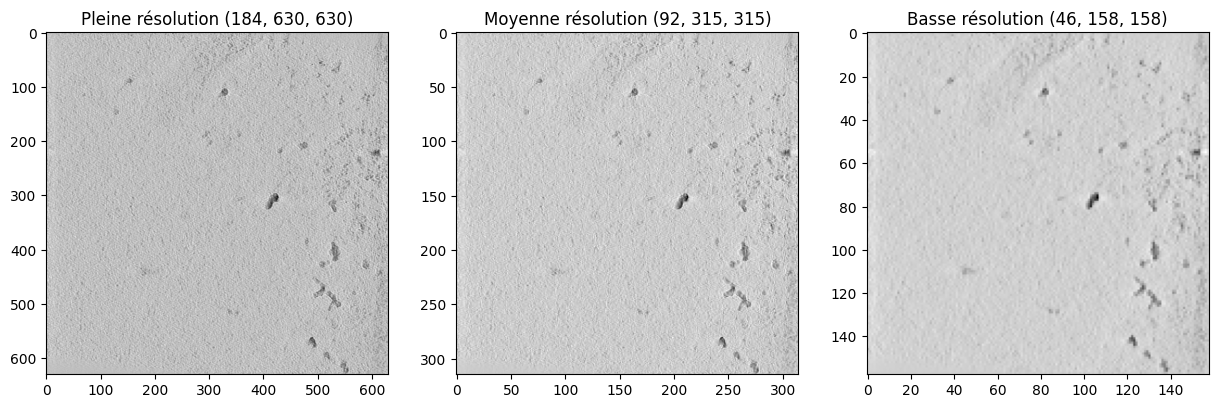

In [5]:
import matplotlib.pyplot as plt

# Afficher une coupe z=0 pour chaque résolution
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(all_data['TS_5_4']['0']['data'][0,:,:], cmap='gray')
axs[0].set_title("Pleine résolution (184, 630, 630)")
axs[1].imshow(all_data['TS_5_4']['1']['data'][0,:,:], cmap='gray')
axs[1].set_title("Moyenne résolution (92, 315, 315)")
axs[2].imshow(all_data['TS_5_4']['2']['data'][0,:,:], cmap='gray')
axs[2].set_title("Basse résolution (46, 158, 158)")
plt.show()

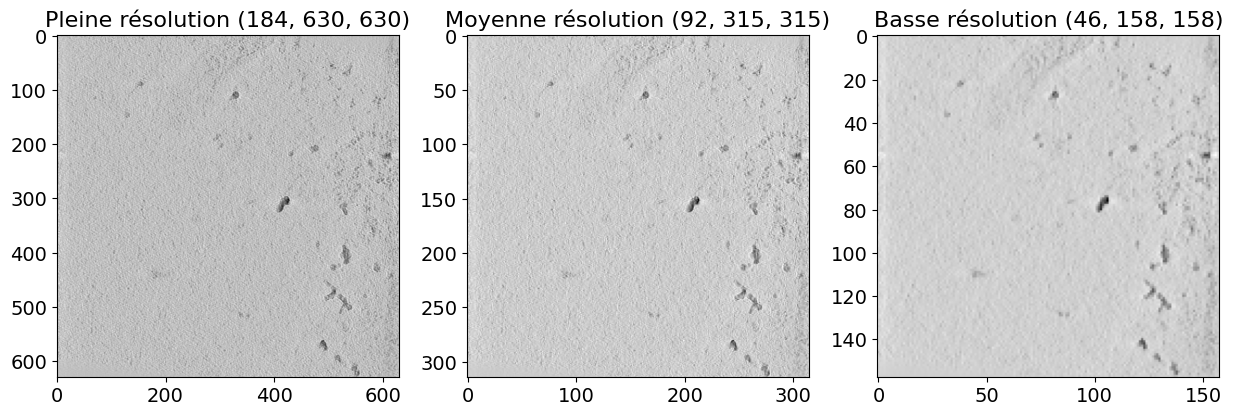

In [6]:
import matplotlib.pyplot as plt

# Afficher une coupe z=0 pour chaque résolution
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Liste des titres
titles = ["Pleine résolution (184, 630, 630)", 
          "Moyenne résolution (92, 315, 315)", 
          "Basse résolution (46, 158, 158)"]

for i, ax in enumerate(axs):
    ax.imshow(all_data['TS_5_4'][str(i)]['data'][0, :, :], cmap='gray')
    ax.set_title(titles[i], fontsize=16)  # Augmenter la taille du titre
    ax.tick_params(axis='both', labelsize=14)  # Augmenter la taille des ticks

plt.show()


In [7]:
import json

def load_targets(base_path):
    # Dictionnaire pour stocker les informations de chaque tomogramme
    target_data = {}

    # Parcourir tous les dossiers dans le chemin de base (numéros de tomogrammes)
    for tomogram_folder in os.listdir(base_path):
        tomogram_path = os.path.join(base_path, tomogram_folder)

        # Vérifier si un dossier "Picks" existe dans le tomogramme
        picks_path = os.path.join(tomogram_path, "Picks")
        if not os.path.exists(picks_path):
            print(f"Pas de dossier 'Picks' dans {tomogram_folder}")
            continue

        # Parcourir tous les fichiers JSON dans le dossier "Picks"
        for json_file in os.listdir(picks_path):
            if json_file.endswith(".json"):
                json_path = os.path.join(picks_path, json_file)

                # Charger le fichier JSON
                with open(json_path, 'r') as f:
                    data = json.load(f)

                # Extraire le nom de la molécule et la localisation des points
                molecule_name = data.get("pickable_object_name", "inconnu")
                points = data.get("points", [])

                # Ajouter les informations au dictionnaire
                if tomogram_folder not in target_data:
                    target_data[tomogram_folder] = {}

                # Sauvegarder les données pour chaque molécule dans le tomogramme
                target_data[tomogram_folder][molecule_name] = points

    return target_data

# Charger les targets
all_targets = load_targets(TARGET_DIR)

# Affichage des données chargées
print("Résumé des données de targets :")
for tomogram, molecules in all_targets.items():
    print(f"- {tomogram}: {len(molecules)} molécules trouvées")
    for molecule, points in molecules.items():
        print(f"  * {molecule}: {len(points)} points")


Résumé des données de targets :
- TS_5_4: 6 molécules trouvées
  * apo-ferritin: 46 points
  * beta-amylase: 10 points
  * beta-galactosidase: 12 points
  * ribosome: 31 points
  * thyroglobulin: 30 points
  * virus-like-particle: 11 points
- TS_69_2: 6 molécules trouvées
  * apo-ferritin: 35 points
  * beta-amylase: 12 points
  * beta-galactosidase: 16 points
  * ribosome: 37 points
  * thyroglobulin: 34 points
  * virus-like-particle: 9 points
- TS_6_4: 6 molécules trouvées
  * apo-ferritin: 58 points
  * beta-amylase: 9 points
  * beta-galactosidase: 12 points
  * ribosome: 74 points
  * thyroglobulin: 30 points
  * virus-like-particle: 10 points
- TS_6_6: 6 molécules trouvées
  * apo-ferritin: 41 points
  * beta-amylase: 14 points
  * beta-galactosidase: 11 points
  * ribosome: 23 points
  * thyroglobulin: 35 points
  * virus-like-particle: 19 points
- TS_73_6: 6 molécules trouvées
  * apo-ferritin: 95 points
  * beta-amylase: 12 points
  * beta-galactosidase: 14 points
  * ribosom

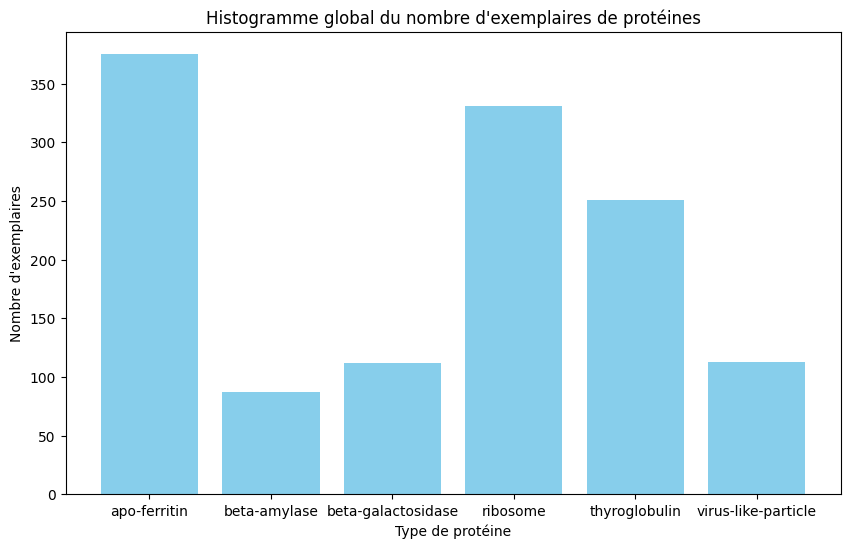

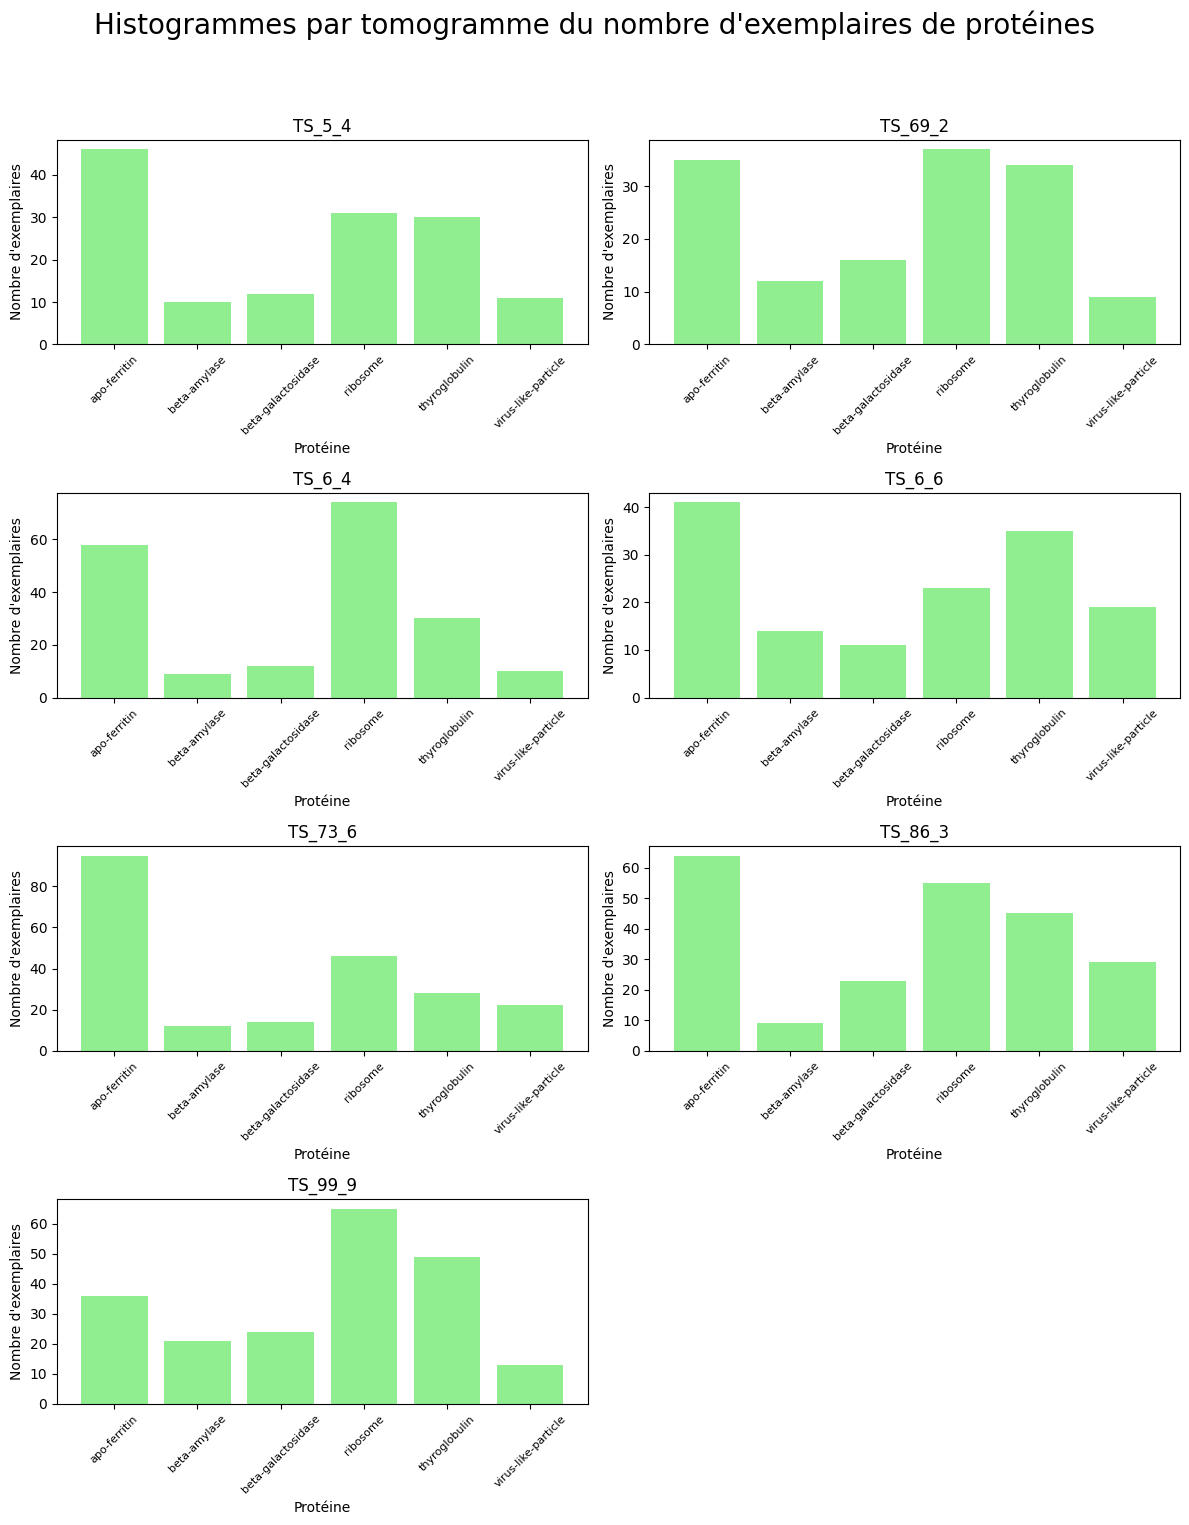

In [8]:
import matplotlib.pyplot as plt
import math

# --- Histogramme global ---
global_counts = {}
for tomogram, molecules in all_targets.items():
    for molecule, points in molecules.items():
        global_counts[molecule] = global_counts.get(molecule, 0) + len(points)

plt.figure(figsize=(10,6))
plt.bar(global_counts.keys(), global_counts.values(), color='skyblue')
plt.xlabel("Type de protéine")
plt.ylabel("Nombre d'exemplaires")
plt.title("Histogramme global du nombre d'exemplaires de protéines")
plt.show()

# --- Histogrammes détaillés par tomogramme ---
# Déterminer le nombre de tomogrammes à afficher
num_tomograms = len(all_targets)
# Choisir une disposition en grille adaptée (par exemple 2 colonnes si plus de 2 tomogrammes)
cols = 2
rows = math.ceil(num_tomograms / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4), squeeze=False)

# Parcourir les tomogrammes et tracer l'histogramme pour chacun
tomogram_names = list(all_targets.keys())
for idx, tomogram in enumerate(tomogram_names):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]
    
    # Calculer le nombre d'exemplaires pour chaque protéine dans ce tomogramme
    counts = {molecule: len(points) for molecule, points in all_targets[tomogram].items()}
    
    ax.bar(counts.keys(), counts.values(), color='lightgreen')
    ax.set_title(tomogram)
    ax.set_xlabel("Protéine")
    ax.set_ylabel("Nombre d'exemplaires")
    # Rotation des étiquettes pour une meilleure lisibilité
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)

# Supprimer les sous-graphes vides s'il y en a
total_plots = rows * cols
if num_tomograms < total_plots:
    for idx in range(num_tomograms, total_plots):
        row = idx // cols
        col = idx % cols
        fig.delaxes(axes[row][col])

plt.suptitle("Histogrammes par tomogramme du nombre d'exemplaires de protéines", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


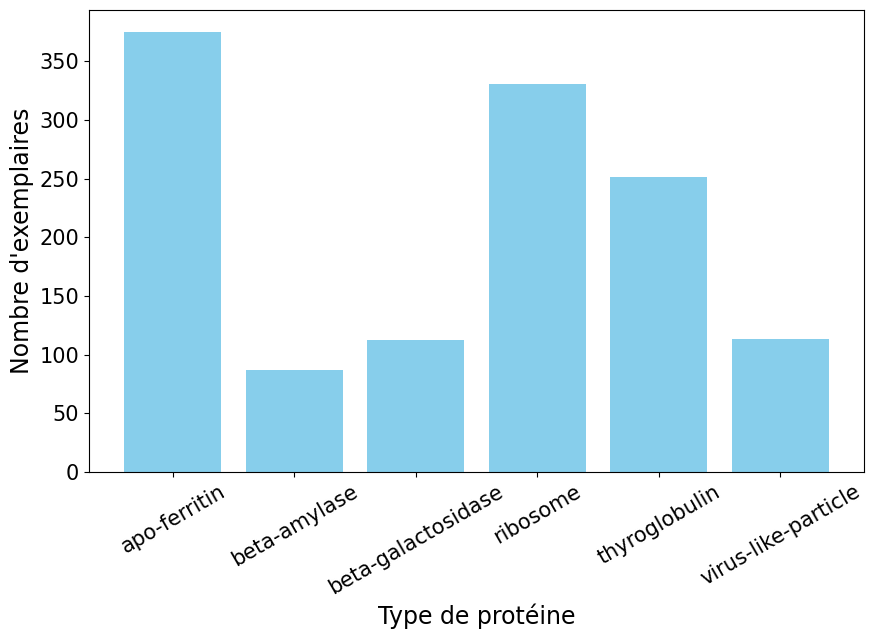

In [9]:
import matplotlib.pyplot as plt
import math

# --- Histogramme global ---
global_counts = {}
for tomogram, molecules in all_targets.items():
    for molecule, points in molecules.items():
        global_counts[molecule] = global_counts.get(molecule, 0) + len(points)

plt.figure(figsize=(10, 6))
plt.bar(global_counts.keys(), global_counts.values(), color='skyblue')
plt.xlabel("Type de protéine", fontsize=17)  # Taille augmentée
plt.ylabel("Nombre d'exemplaires", fontsize=17)  # Taille augmentée
# plt.title("Histogramme global du nombre d'exemplaires de protéines", fontsize=22)  # Taille augmentée
plt.xticks(rotation=30, fontsize=15)  # Rotation pour meilleure lisibilité
plt.yticks(fontsize=15)
plt.show()


In [10]:
import os
import zarr
import json

def prepare_dataset(image_path, target_path):
    """
    Prépare un dataset associant les données d'images aux targets (protéines et positions).
    
    Args:
        image_path (str): Chemin vers le dossier contenant les images Zarr.
        target_path (str): Chemin vers le dossier contenant les targets (fichiers JSON).

    Returns:
        list: Liste de dictionnaires, où chaque élément contient les données d'un tomogramme :
            - "name": Nom du tomogramme.
            - "images": Liste des résolutions (volumes 3D).
            - "targets": Dictionnaire {type_molécule: [positions (x, y, z)]}.
    """
    dataset = []

    # Parcourir les tomogrammes dans le dossier des images
    for tomogram_name in os.listdir(image_path):
        tomogram_image_path = os.path.join(image_path, tomogram_name, "VoxelSpacing10.000/denoised.zarr")
        tomogram_target_path = os.path.join(target_path, tomogram_name, "Picks")

        # Vérifier que les données Zarr et les targets existent
        if not os.path.exists(tomogram_image_path):
            print(f"Images non trouvées pour {tomogram_name}, ignoré.")
            continue

        if not os.path.exists(tomogram_target_path):
            print(f"Targets non trouvés pour {tomogram_name}, ignoré.")
            continue

        # Charger les images (volumes 3D à plusieurs résolutions)
        zgroup = zarr.open_group(tomogram_image_path, mode='r')
        sorted_keys = sorted(zgroup.keys(), key=lambda k: np.prod(zgroup[k].shape), reverse=True)
        images = [zgroup[key][:] for key in sorted_keys]

        # Charger les targets (localisations des particules)
        targets = {}
        for json_file in os.listdir(tomogram_target_path):
            if json_file.endswith(".json"):
                json_path = os.path.join(tomogram_target_path, json_file)
                with open(json_path, 'r') as f:
                    data = json.load(f)
                    molecule_name = data.get("pickable_object_name", "unknown")
                    points = [
                        [point["location"]["x"], point["location"]["y"], point["location"]["z"]]
                        for point in data["points"]
                    ]
                    if molecule_name not in targets:
                        targets[molecule_name] = []
                    targets[molecule_name].extend(points)

        # Ajouter les données du tomogramme au dataset
        dataset.append({
            "name": tomogram_name,
            "images": images,  # Liste des résolutions
            "targets": targets  # Localisations des particules par type
        })

    return dataset

# print tomogram shapes for each resolution in the order of the dataset
def print_shapes(dataset):
    for tomogram in dataset:
        print(f"Tomogramme {tomogram['name']}:")
        for i, image in enumerate(tomogram['images']):
            print(f"  - Résolution {i}: {image.shape}")




In [11]:
# Chemins des données

# Préparer le dataset
dataset = prepare_dataset(DATA_DIR, TARGET_DIR)

print_shapes(dataset)

# Exemple : Afficher les données du premier tomogramme
print(f"Nom du tomogramme : {dataset[0]['name']}")
print(f"Forme de l'image (résolution 1) : {dataset[0]['images'][0].shape}")
print(f"Targets : {dataset[0]['targets']}")

Tomogramme TS_5_4:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_69_2:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_6_4:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_6_6:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_73_6:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_86_3:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_99_9:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Nom du tomogramme : TS_5_4
Forme de l'image (résolution 1) : (184, 630, 630)
Targets : {'apo-ferritin': [[468.514, 5915.906, 604.167], [5674.694, 1114.354, 565.068

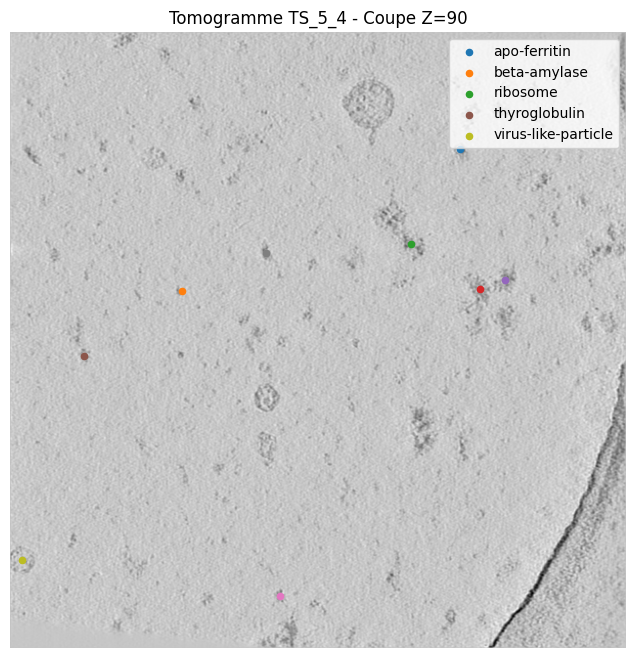

In [12]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# On suppose que les dictionnaires all_data et all_targets ont été générés par vos fonctions process_experiment_runs et load_targets.
# Par exemple :
#   all_data = process_experiment_runs(DATA_DIR)
#   all_targets = load_targets(TARGET_DIR)

voxel_size = 10  # Même valeur utilisée lors du chargement et de l'analyse

# Choisir un tomogramme et une résolution (ici, 'TS_5_4' et le groupe '0' pour la pleine résolution)
tomogram_folder = 'TS_5_4'
resolution_group = '0'
slice_index = 90  # Coupe à afficher sur l'axe Z

# Charger la coupe du tomogramme
tomogram_volume = all_data[tomogram_folder][resolution_group]['data']
image_slice = tomogram_volume[slice_index, :, :]

plt.figure(figsize=(8, 8))
plt.imshow(image_slice, cmap='gray')
plt.title(f"Tomogramme {tomogram_folder} - Coupe Z={slice_index}")

# Vérifier si des cibles (targets) sont présentes pour ce tomogramme
if tomogram_folder in all_targets:
    molecules = all_targets[tomogram_folder]
    
    # Pour éviter les doublons dans la légende
    legend_entries = {}
    
    for molecule, points in molecules.items():
        for point in points:
            # Extraction des coordonnées depuis la clé "location"
            x = point["location"]["x"] / voxel_size
            y = point["location"]["y"] / voxel_size
            z = point["location"]["z"] / voxel_size  # Coordonnée Z en voxels
            
            # N'afficher que les points proches de la coupe sélectionnée
            if abs(z - slice_index) < 3:  # Seuil ajustable selon la précision désirée
                sc = plt.scatter(x, y, s=20)
                if molecule not in legend_entries:
                    legend_entries[molecule] = sc

    if legend_entries:
        plt.legend(legend_entries.values(), legend_entries.keys(), loc='upper right')

plt.axis('off')
plt.show()



In [13]:
# # same with napari

# colors = {
#     "apo-ferritin": 'red',
#     "beta-amylase": 'green',
#     "beta-galactosidase": 'blue',
#     "ribosome": 'orange',
#     "thyroglobulin": 'purple',
#     "virus-like-particle": 'cyan',
#     # Vous pouvez ajouter d'autres molécules si nécessaire.
# }

# import napari

# # Choisir un tomogramme et une résolution (ici, 'TS_5_4' et le groupe '0' pour la pleine résolution)
# tomogram_folder = 'TS_5_4'
# resolution_group = '0'

# # Charger le volume du tomogramme
# tomogram_volume = all_data[tomogram_folder][resolution_group]['data']

# # Créer une nouvelle instance Napari
# viewer = napari.Viewer()

# # Ajouter le volume du tomogramme
# viewer.add_image(tomogram_volume, name=tomogram_folder)

# # Ajouter les cibles (targets) si elles existent
# if tomogram_folder in all_targets:
#     molecules = all_targets[tomogram_folder]
#     print(f"Chargement des cibles pour {tomogram_folder}...")
#     print('Il y a', len(molecules), 'molécules')
    
#     for molecule, points in molecules.items():
#         print(f"  * {molecule}: {len(points)} points")
#         points_array = np.array([
#             [point["location"]["z"], point["location"]["y"], point["location"]["x"]]  # Permuter les axes X et Z
#             for point in points
#         ]) / voxel_size

#         print("Shape du tomogramme:", tomogram_volume.shape)
#         print("Min des points:", points_array.min(axis=0))
#         print("Max des points:", points_array.max(axis=0))

#         print("Il y a", len(points_array), "points")
#         print("Premier point:", points_array[0])
        

#         # Ajouter les points à la visualisation (petite sphère pour chaque point)
#         viewer.add_points(points_array, name=molecule, size=13, face_color=colors.get(molecule, 'white'))
        
#     # vérifier l'origine des axes (en haut à gauche dans napari)
#     viewer.add_points(np.array([[0, 0, 0]]), name='origine', size=13, face_color='yellow')

# # run the viewer
# viewer.show()


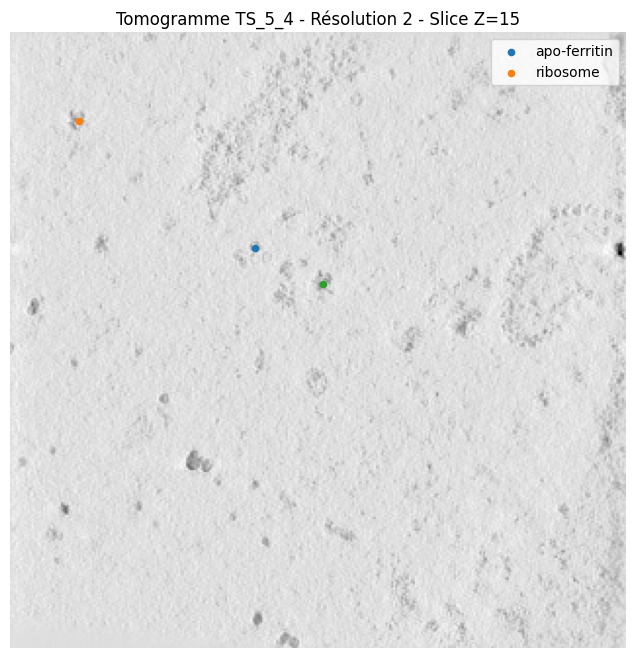

In [14]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# On suppose que les dictionnaires all_data et all_targets ont été générés par vos fonctions process_experiment_runs et load_targets.
# Par exemple :
#   all_data = process_experiment_runs(DATA_DIR)
#   all_targets = load_targets(TARGET_DIR)

# Pour la résolution 2, le voxel_size est 4 fois celui de la résolution 0 (4 * 10 = 40)
voxel_size = 20  
tomogram_folder = 'TS_5_4'
resolution_group = '1'
slice_index = 15  # Choix d'une slice au milieu du volume de résolution 2 (le volume a 46 slices)

# Charger la coupe du tomogramme à la résolution 2
tomogram_volume = all_data[tomogram_folder][resolution_group]['data']
image_slice = tomogram_volume[slice_index, :, :]

plt.figure(figsize=(8, 8))
plt.imshow(image_slice, cmap='gray')
plt.title(f"Tomogramme {tomogram_folder} - Résolution 2 - Slice Z={slice_index}")

# Vérifier si des cibles (targets) sont présentes pour ce tomogramme
if tomogram_folder in all_targets:
    molecules = all_targets[tomogram_folder]
    
    # Pour éviter les doublons dans la légende
    legend_entries = {}
    
    for molecule, points in molecules.items():
        for point in points:
            # Conversion des coordonnées physiques en indices voxels en divisant par voxel_size (40 à cette résolution)
            x = point["location"]["x"] / voxel_size
            y = point["location"]["y"] / voxel_size
            z = point["location"]["z"] / voxel_size  # Coordonnée Z en voxels
            
            # Afficher uniquement les points proches de la slice sélectionnée
            if abs(z - slice_index) < 0.75:
                sc = plt.scatter(x, y, s=20)
                if molecule not in legend_entries:
                    legend_entries[molecule] = sc

    if legend_entries:
        plt.legend(legend_entries.values(), legend_entries.keys(), loc='upper right')

plt.axis('off')
plt.show()


In [15]:
# --- PARTIE 2 : PRÉPARATION DES PATCHES ET DES MASQUES DE SEGMENTATION ---
import tensorflow as tf
voxel_size = 10  # Même valeur utilisée précédemment

# Mapping des molécules aux indices de classes.
# La classe 0 sera réservée au fond.
class_mapping = {
    "background": 0,
    "apo-ferritin": 1,
    "beta-amylase": 2,
    "ribosome": 3,
    "thyroglobulin": 4,
    "virus-like-particle": 5,
    "beta-galactosidase": 6
    # Vous pouvez ajouter d'autres molécules si nécessaire.
}

def generate_mask(volume_shape, targets, voxel_size, class_mapping, sphere_radius=2):
    """
    Crée un masque de segmentation (de dimensions volume_shape) à partir des targets.
    Pour chaque point, on convertit la position physique en indice voxel et on dessine
    une petite sphère (de rayon sphere_radius voxels) avec la classe correspondante.
    
    Args:
        volume_shape (tuple): Dimensions du volume (Z, Y, X).
        targets (dict): Dictionnaire des targets avec pour chaque molécule une liste de points.
        voxel_size (float): Facteur de conversion des coordonnées physiques en indices voxels.
        class_mapping (dict): Mapping de la molécule vers l'indice de classe (0 pour le fond, >0 pour les particules).
        sphere_radius (int): Rayon de la sphère (en voxels) à dessiner autour de chaque point.
        
    Returns:
        ndarray: Masque de segmentation de dimensions volume_shape.
    """
    mask = np.zeros(volume_shape, dtype=np.uint8)  # Fond = 0
    for molecule, points in targets.items():
        if molecule not in class_mapping:
            continue
        class_idx = class_mapping[molecule]
        for point in points:
            # Si le point est un dictionnaire avec la clé "location", on l'utilise
            if isinstance(point, dict) and "location" in point:
                x_coord = point["location"]["x"]
                y_coord = point["location"]["y"]
                z_coord = point["location"]["z"]
            else:
                # Sinon, on suppose que le point est une liste/tuple de coordonnées [x, y, z]
                x_coord, y_coord, z_coord = point
            
            x_center = int(round(x_coord / voxel_size))
            y_center = int(round(y_coord / voxel_size))
            z_center = int(round(z_coord / voxel_size))
            
            # Dessiner une petite sphère autour du point
            for dz in range(-sphere_radius, sphere_radius + 1):
                for dy in range(-sphere_radius, sphere_radius + 1):
                    for dx in range(-sphere_radius, sphere_radius + 1):
                        if dx**2 + dy**2 + dz**2 <= sphere_radius**2:
                            z_idx = z_center + dz
                            y_idx = y_center + dy
                            x_idx = x_center + dx
                            if (0 <= z_idx < volume_shape[0] and
                                0 <= y_idx < volume_shape[1] and
                                0 <= x_idx < volume_shape[2]):
                                mask[z_idx, y_idx, x_idx] = class_idx
    return mask

def extract_grid_patches(volume, mask, num_cubes_axis):
    """
    Extrait tous les patches qui couvrent entièrement le volume en divisant chaque dimension en num_cubes_axis segments.
    On suppose que le volume est exactement divisible par num_cubes_axis sur chaque axe.
    
    Args:
        volume (ndarray): Volume 3D d'entrée, de forme (Z, Y, X).
        mask (ndarray): Masque associé, de même forme.
        num_cubes_axis (int): Nombre de segments (patchs) par axe (exemple : 4 donnera 4x4x4 = 64 patches).
        
    Returns:
        tuple: (patches_img, patches_mask) 
               - patches_img : liste de patches d'image.
               - patches_mask : liste de patches de masque.
    """
    z_dim, y_dim, x_dim = volume.shape
    patch_size_z = z_dim // num_cubes_axis
    patch_size_y = y_dim // num_cubes_axis
    patch_size_x = x_dim // num_cubes_axis
    
    patches_img = []
    patches_mask = []
    
    for i in range(num_cubes_axis):
        for j in range(num_cubes_axis):
            for k in range(num_cubes_axis):
                z0 = i * patch_size_z
                y0 = j * patch_size_y
                x0 = k * patch_size_x
                patch_img = volume[z0:z0+patch_size_z, y0:y0+patch_size_y, x0:x0+patch_size_x]
                patch_mask = mask[z0:z0+patch_size_z, y0:y0+patch_size_y, x0:x0+patch_size_x]
                patches_img.append(patch_img)
                patches_mask.append(patch_mask)
    
    return patches_img, patches_mask



In [16]:
X_train_list = []
Y_train_list = []

# Ici, num_cubes_axis doit être choisi de façon à diviser exactement les dimensions du volume.
# Par exemple, pour le volume (184, 630, 630), on pourra choisir num_cubes_axis = 2 ou 4
# si les dimensions sont exactement divisibles par ce nombre.
num_cubes_axis = 2  # Exemple : divise le volume en 2x2x2 = 8 patches

for tomogram in dataset:
    volume = tomogram["images"][2]  # Utilisation de la résolution la plus fine
    mask_full = generate_mask(volume.shape, tomogram["targets"], voxel_size, class_mapping)
    print(f"Tomogramme {tomogram['name']} volume: {volume.shape}, masque: {mask_full.shape}")
    
    patches_img, patches_mask = extract_grid_patches(volume, mask_full, num_cubes_axis)
    
    for patch_img, patch_mask in zip(patches_img, patches_mask):
         # On ajoute la dimension de canal à l'image patch (le modèle attend (patch_size_z, patch_size_y, patch_size_x, 1))
         patch_img = patch_img[..., np.newaxis]
         X_train_list.append(patch_img)
         Y_train_list.append(patch_mask)

X_train = np.array(X_train_list, dtype=np.float32)
Y_train_int = np.array(Y_train_list, dtype=np.uint8)
print("X_train shape:", X_train.shape)
print("Y_train_int shape:", Y_train_int.shape)

# Conversion du masque en encodage one-hot (le modèle attend n_classes canaux en sortie)
Y_train = tf.keras.utils.to_categorical(Y_train_int, num_classes=7)
print("Y_train shape (one-hot):", Y_train.shape)

Tomogramme TS_5_4 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_69_2 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_6_4 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_6_6 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_73_6 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_86_3 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_99_9 volume: (46, 158, 158), masque: (46, 158, 158)
X_train shape: (56, 23, 79, 79, 1)
Y_train_int shape: (56, 23, 79, 79)
Y_train shape (one-hot): (56, 23, 79, 79, 7)


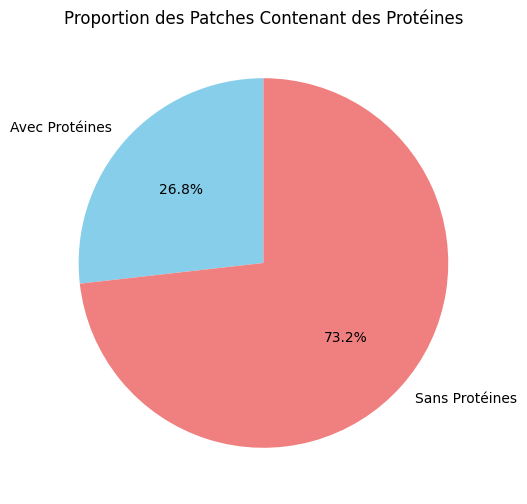

(15, 41, 56)

In [17]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import matplotlib.pyplot as plt

# Reload Y_train_int if available
# Assuming Y_train_int is available after the reset
# If not, you may need to redefine and reload the dataset

# Determine the presence of proteins in each patch (binary: 0 = background, 1 = contains proteins)
patch_contains_protein = (Y_train_int > 0).any(axis=(1, 2, 3))

# Compute proportions
num_patches = len(Y_train_int)
num_with_proteins = np.sum(patch_contains_protein)
num_without_proteins = num_patches - num_with_proteins

# Display as a pie chart
labels = ["Avec Protéines", "Sans Protéines"]
sizes = [num_with_proteins, num_without_proteins]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title("Proportion des Patches Contenant des Protéines")
plt.show()

# Display numerical results
num_with_proteins, num_without_proteins, num_patches


In [18]:
import numpy as np
import pandas as pd

# --- Suppression des patchs sans protéines ---
indices_with_protein = np.where((Y_train_int > 0).any(axis=(1, 2, 3)))[0]

# Construire les nouveaux ensembles filtrés
X_train_balanced = X_train[indices_with_protein]
Y_train_int_balanced = Y_train_int[indices_with_protein]

# Vérifier la distribution des classes (y compris le background)
unique_classes, counts = np.unique(Y_train_int_balanced, return_counts=True)

# Mapping des classes vers les noms de protéines
class_labels = {
    0: "Background",
    1: "Apo-Ferritin",
    2: "Beta-Amylase",
    3: "Beta-Galactosidase",
    4: "Ribosome",
    5: "Thyroglobulin",
    6: "Virus-Like-Particle"
}

# Calculer le pourcentage exact de chaque classe
total_voxels = np.sum(counts)
percentages = (counts / total_voxels) * 100

# Construire un tableau avec les noms des classes et leurs pourcentages exacts
df_percentages = pd.DataFrame({
    "Classe": [class_labels.get(int(cls), f"Classe {cls}") for cls in unique_classes],
    "Nombre de Voxels": counts,
    "Pourcentage (%)": percentages
})

print(df_percentages)

               Classe  Nombre de Voxels  Pourcentage (%)
0          Background           2152530        99.971437
1        Apo-Ferritin                53         0.002462
2        Beta-Amylase                33         0.001533
3  Beta-Galactosidase               462         0.021457
4            Ribosome                67         0.003112


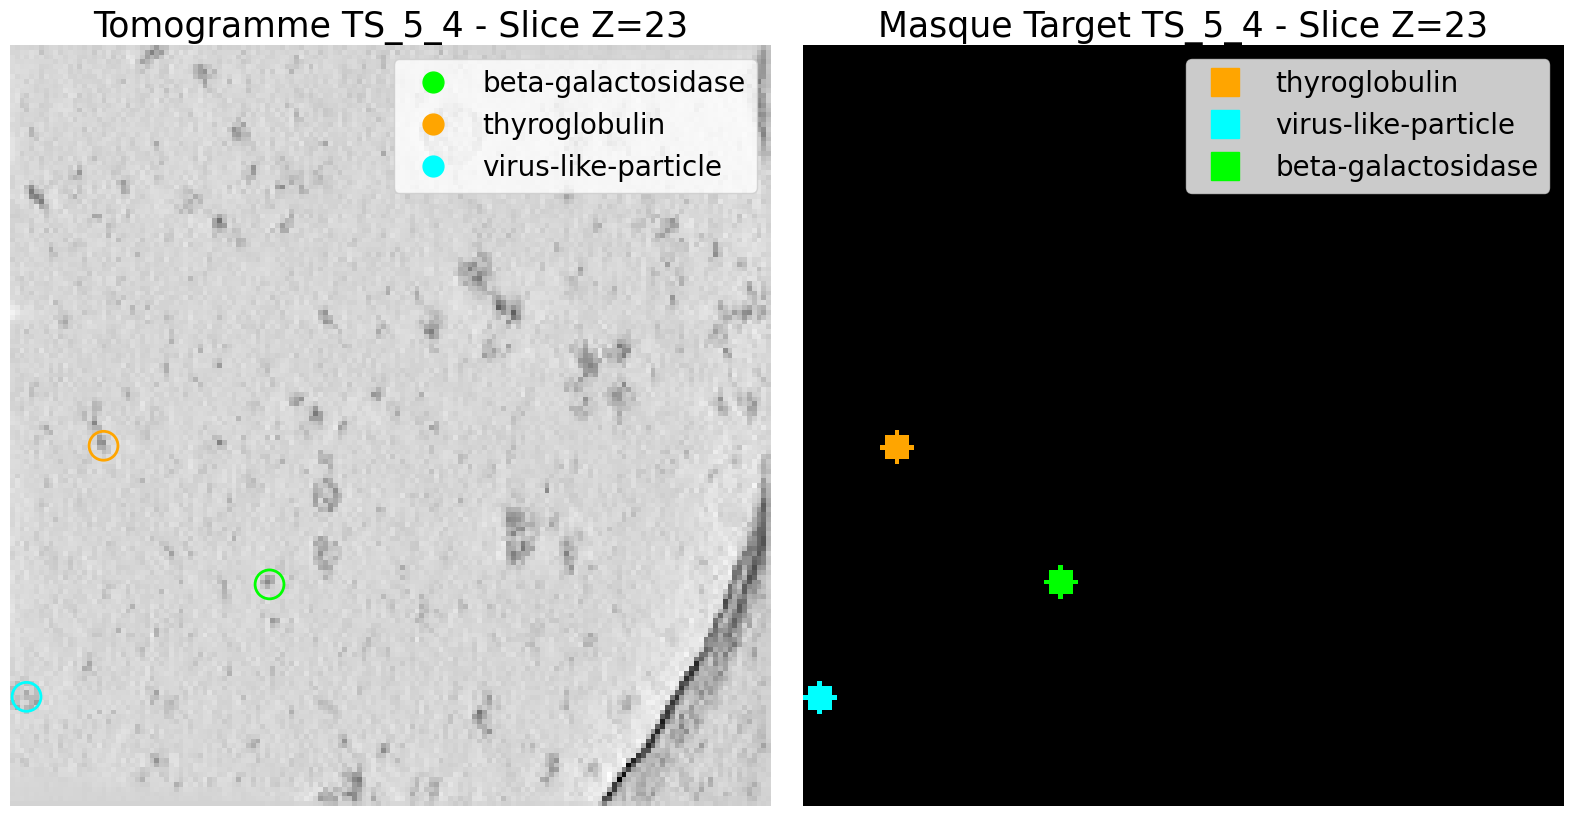

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def generate_colored_mask(volume_shape, targets, voxel_size, class_mapping, slice_index, sphere_radius=3, colors=None):
    """
    Génère une image couleur 2D du masque pour une slice Z donnée, 
    avec les couleurs correspondant aux protéines affichées dans la légende.
    """
    mask_slice = np.zeros((volume_shape[1], volume_shape[2], 3), dtype=np.uint8)  # Image couleur (Y, X, RGB)
    
    for molecule, points in targets.items():
        if molecule not in class_mapping:
            continue
        color = colors.get(molecule, (255, 255, 255))  # Blanc par défaut si couleur non définie

        for point in points:
            # Extraire les coordonnées et convertir en indices de voxel
            x_coord = int(round(point["location"]["x"] / voxel_size))
            y_coord = int(round(point["location"]["y"] / voxel_size))
            z_coord = int(round(point["location"]["z"] / voxel_size))
            
            # Vérifier si la particule appartient à la slice sélectionnée
            if z_coord == slice_index:
                for dy in range(-sphere_radius, sphere_radius + 1):
                    for dx in range(-sphere_radius, sphere_radius + 1):
                        if dx**2 + dy**2 <= sphere_radius**2:  # Approximation d'un cercle
                            y_idx = y_coord + dy
                            x_idx = x_coord + dx
                            if 0 <= y_idx < volume_shape[1] and 0 <= x_idx < volume_shape[2]:
                                mask_slice[y_idx, x_idx] = color  # Appliquer la couleur spécifique

    return mask_slice

def display_tomogram_and_target(all_data, all_targets, tomogram_folder, resolution_group, slice_index, voxel_size, class_mapping, sphere_radius=3):
    """
    Affiche côte à côte la coupe du tomogramme et le masque target colorisé.
    """
    # Charger le volume et extraire la coupe
    volume = all_data[tomogram_folder][resolution_group]['data']
    image_slice = volume[slice_index, :, :]

    # Filtrer uniquement les protéines visibles sur la coupe sélectionnée
    targets_filtered = {}
    for molecule, points in all_targets.get(tomogram_folder, {}).items():
        filtered_points = [p for p in points if round(p["location"]["z"] / voxel_size) == slice_index]
        if filtered_points:
            targets_filtered[molecule] = filtered_points

    # Palette de couleurs associée aux molécules (en format RGB)
    colors = {
        "apo-ferritin": (255, 0, 0),        # Rouge
        "beta-amylase": (0, 0, 255),        # Bleu
        "ribosome": (128, 0, 128),          # Violet
        "thyroglobulin": (255, 165, 0),     # Orange
        "virus-like-particle": (0, 255, 255),  # Cyan
        "beta-galactosidase": (0, 255, 0)   # Vert
    }

    # Générer le masque coloré
    mask_colored = generate_colored_mask(volume.shape, targets_filtered, voxel_size, class_mapping, slice_index, sphere_radius, colors)

    # Création de la figure avec deux sous-graphes
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # --- Affichage de la coupe du tomogramme avec les targets ---
    axs[0].imshow(image_slice, cmap='gray')
    axs[0].set_title(f"Tomogramme {tomogram_folder} - Slice Z={slice_index}", fontsize=25)

    legend_entries = {}
    for molecule, points in targets_filtered.items():
        color = np.array(colors.get(molecule, (255, 255, 255))) / 255  # Normaliser en [0,1]
        for point in points:
            x = point["location"]["x"] / voxel_size
            y = point["location"]["y"] / voxel_size
            circle = plt.Circle((x, y), radius=sphere_radius, color=color, fill=False, linewidth=2)
            axs[0].add_patch(circle)

            if molecule not in legend_entries:
                legend_entries[molecule] = plt.Line2D([0], [0], marker='o', color=color, markersize=15, linestyle='', label=molecule)

    if legend_entries:
        axs[0].legend(handles=legend_entries.values(), loc='upper right', fontsize=20)  # 🔹 Taille de légende augmentée
    axs[0].axis('off')

    # --- Affichage du masque coloré ---
    axs[1].imshow(mask_colored)  # Pas de cmap car l'image est en couleur
    axs[1].set_title(f"Masque Target {tomogram_folder} - Slice Z={slice_index}", fontsize=25)

    # Ajouter une légende basée sur les couleurs des protéines
    legend_entries_mask = [
        plt.Line2D([0], [0], marker='s', color=np.array(color)/255, markersize=20, linestyle='', label=molecule)
        for molecule, color in colors.items() if molecule in targets_filtered
    ]
    
    if legend_entries_mask:
        axs[1].legend(handles=legend_entries_mask, loc='upper right', fontsize=20)  # 🔹 Taille de légende augmentée
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()


# --- Exemple d'utilisation ---
voxel_size = 40
tomogram_folder = 'TS_5_4'
resolution_group = '2'
slice_index = 23  # Slice Z à afficher

display_tomogram_and_target(all_data, all_targets, tomogram_folder, resolution_group, slice_index, voxel_size, class_mapping, sphere_radius=3)


In [26]:
# Définir le nombre de classes (7 classes au total, y compris le background)
num_classes = 5

# Conversion de Y_train_int_balanced en encodage one-hot
Y_train_balanced = tf.keras.utils.to_categorical(Y_train_int_balanced, num_classes=num_classes)

# Vérifier la nouvelle shape
Y_train_balanced.shape


(15, 23, 79, 79, 5)

In [27]:
import numpy as np

# Afficher les valeurs uniques présentes dans Y_train (données segmentées)
unique_values = np.unique(Y_train_int)  # Y_train_int est la version non one-hot de Y_train

unique_values


array([0, 1, 2, 3, 4], dtype=uint8)

X_train_augmented shape: (15, 23, 79, 79, 1)
Y_train_augmented shape: (15, 23, 79, 79, 7)


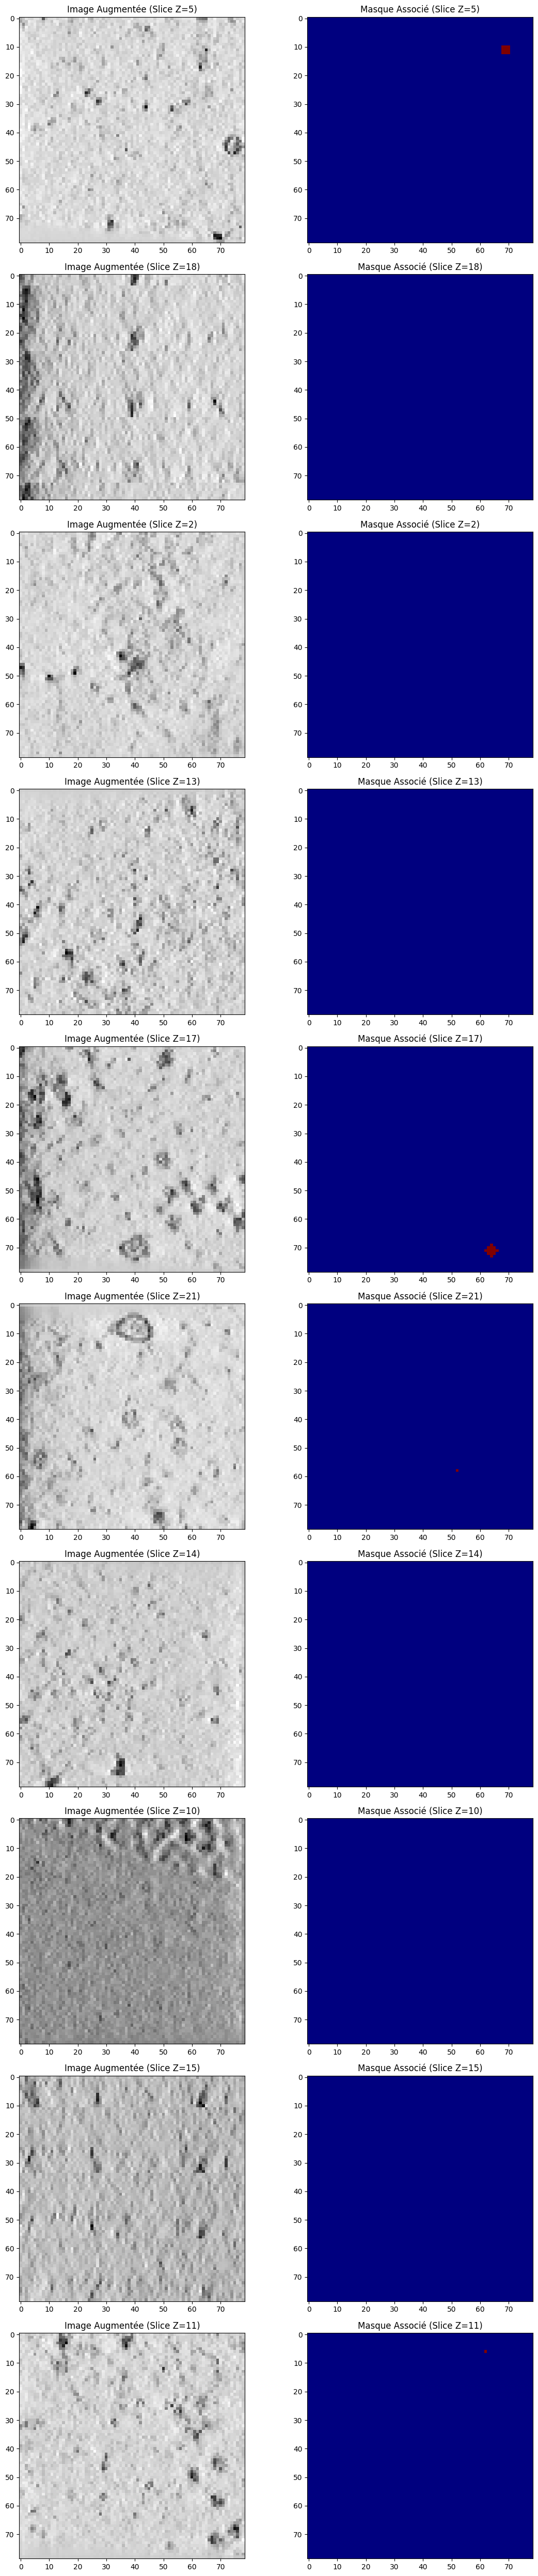

In [31]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.core.transforms_interface import ImageOnlyTransform

# Définition des transformations (utilisation d'Albumentations)
transformations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    # A.ElasticTransform(alpha=15, sigma=2.5, p=0.5),
    # A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
    # A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
], additional_targets={'mask': 'image'})


def apply_augmentations(image, mask):
    """Applique les transformations de manière synchronisée sur l'image et son masque."""
    transformed = transformations(image=image, mask=mask)
    augmented_image = transformed['image']
    augmented_mask = transformed['mask']
    
    # S'assurer que l'image et le masque ont la même taille que l'original
    if augmented_image.shape != image.shape:
        augmented_image = np.resize(augmented_image, image.shape)
    if augmented_mask.shape != mask.shape:
        augmented_mask = np.resize(augmented_mask, mask.shape)
    
    return augmented_image, augmented_mask


def visualize_augmented_samples(X_aug, Y_aug, all_targets, voxel_size, num_samples=5):
    """Affiche plusieurs exemples d'images augmentées avec leurs masques et protéines associées."""
    indices = np.random.choice(len(X_aug), num_samples, replace=False)
    colors = {
        "apo-ferritin": "red",
        "beta-amylase": "blue",
        "ribosome": "purple",
        "thyroglobulin": "orange",
        "virus-like-particle": "cyan",
        "beta-galactosidase": "green"
    }
    
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, num_samples * 5))
    
    for i, idx in enumerate(indices):
        image = X_aug[idx].squeeze()
        mask = Y_aug[idx].argmax(axis=-1)  # Convertir one-hot en index de classe
        slice_idx = random.randint(0,23)  # Slice médiane sur l'axe Z
        
        axes[i, 0].imshow(image[slice_idx, :, :], cmap='gray')
        axes[i, 0].set_title("Image Augmentée (Slice Z={})".format(slice_idx))
        
        # Ajouter les protéines avec des couleurs associées
        legend_entries = {}
        for molecule, points in all_targets.items():
            color = colors.get(molecule, "yellow")
            for point in points:
                if isinstance(point, dict) and "location" in point:
                    x = point["location"]["x"] / voxel_size
                    y = point["location"]["y"] / voxel_size
                    z = point["location"]["z"] / voxel_size
                    if abs(z - slice_idx) < 1:
                        sc = axes[i, 0].scatter(x, y, s=50, edgecolors=color, facecolors='none', linewidths=1.5)
                        if molecule not in legend_entries:
                            legend_entries[molecule] = sc
        
        if legend_entries:
            axes[i, 0].legend(legend_entries.values(), legend_entries.keys(), loc='upper right')
        
        axes[i, 1].imshow(mask[slice_idx, :, :], cmap='jet')
        axes[i, 1].set_title("Masque Associé (Slice Z={})".format(slice_idx))
    
    plt.tight_layout()
    plt.show()

# Appliquer les augmentations et créer le dataset final
X_train_augmented = []
Y_train_augmented = []

for i in range(len(X_train_balanced)):
    image = X_train_balanced[i]
    mask = Y_train_int_balanced[i]
    
    # Vérifier si l'image contient une protéine (au moins un voxel > 0 dans le masque)
    if np.any(mask > 0):
        # Appliquer l'augmentation sur l'image et son masque
        augmented_image, augmented_mask = apply_augmentations(image.squeeze(), mask)
        
        # S'assurer que l'augmentation garde la même forme
        augmented_image = np.array(augmented_image, dtype=np.float32)
        augmented_mask = np.array(augmented_mask, dtype=np.uint8)
        
        # Ajouter les données transformées
        X_train_augmented.append(augmented_image[..., np.newaxis])  # Restaurer la dimension du canal
        Y_train_augmented.append(augmented_mask)
    else:
        # Ajouter directement les images sans augmentation si elles ne contiennent pas de protéines
        X_train_augmented.append(image)
        Y_train_augmented.append(mask)

# Convertir en tableau numpy
X_train_augmented = np.array(X_train_augmented, dtype=np.float32)
Y_train_int_augmented = np.array(Y_train_augmented, dtype=np.uint8)
Y_train_augmented = tf.keras.utils.to_categorical(Y_train_int_augmented, num_classes=7)

# Affichage des nouvelles tailles
print("X_train_augmented shape:", X_train_augmented.shape)
print("Y_train_augmented shape:", Y_train_augmented.shape)

# Visualiser plusieurs images augmentées avec protéines associées
visualize_augmented_samples(X_train_augmented, Y_train_augmented, all_targets, voxel_size, num_samples=10)

In [29]:
from sklearn.model_selection import train_test_split

# 1. Séparer X_train_balanced et Y_train_balanced en train + temp (80% - 20%)
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_train_balanced, Y_train_balanced, test_size=0.2, random_state=42)

# 2. Séparer X_temp et Y_temp en validation et test (50% pour chacun de la partie 20%)
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42)

# Afficher les tailles des splits
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Train set: (12, 23, 79, 79, 1), Validation set: (1, 23, 79, 79, 1), Test set: (2, 23, 79, 79, 1)


In [30]:
print("Y_train contient NaN ?", np.isnan(Y_train).any())
print("X_train contient NaN ?", np.isnan(X_train).any())


Y_train contient NaN ? False
X_train contient NaN ? False


In [23]:
import numpy as np
unique_values, counts = np.unique(Y_train, return_counts=True)
value_counts = dict(zip(unique_values, counts))

value_counts


{0.0: 20670192, 1.0: 3445032}

In [24]:
np.unique(Y_train)

array([0., 1.])

In [25]:
# def protein_accuracy(y_true, y_pred):
#     y_true_labels = tf.argmax(y_true, axis=-1)
#     y_pred_labels = tf.argmax(y_pred, axis=-1)
#     mask = tf.not_equal(y_true_labels, 0)
#     correct = tf.equal(y_true_labels, y_pred_labels)
#     correct_masked = tf.boolean_mask(correct, mask)
    
#     # Si aucun voxel de protéine n'est présent, retourner 0 pour éviter NaN.
#     return tf.cond(tf.equal(tf.size(correct_masked), 0),
#                    lambda: tf.constant(0.0, dtype=tf.float32),
#                    lambda: tf.reduce_mean(tf.cast(correct_masked, tf.float32)))


def protein_accuracy(y_true, y_pred):
    y_true_labels = tf.argmax(y_true, axis=-1)
    y_pred_labels = tf.argmax(y_pred, axis=-1)
    mask = tf.not_equal(y_true_labels, 0)
    correct = tf.equal(y_true_labels, y_pred_labels)
    correct_masked = tf.boolean_mask(correct, mask)

    return tf.reduce_sum(tf.cast(correct_masked, tf.float32)) / tf.maximum(1.0, tf.reduce_sum(tf.cast(mask, tf.float32)))



In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, Cropping3D, Concatenate, Dropout, BatchNormalization, Activation, ZeroPadding3D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.saving import register_keras_serializable


# Vos poids de classe pour les protéines (les clés correspondent aux noms de molécules)
protein_weights = {
    'background': 1,
    'apo-ferritin': 1,
    'beta-amylase': 1,
    'beta-galactosidase': 1,
    'ribosome': 1,
    'thyroglobulin': 1,
    'virus-like-particle': 1,
}


# Mapping des molécules vers leurs indices (classe 0 = fond)
class_mapping = {
    "background": 0,
    "apo-ferritin": 1,
    "beta-amylase": 2,
    "ribosome": 3,
    "thyroglobulin": 4,
    "virus-like-particle": 5,
    "beta-galactosidase": 6
}
# On suppose ici que le nombre total de classes (background + protéines) est 7.
n_classes = 7


@register_keras_serializable()
def weighted_categorical_crossentropy(weights_dict, class_mapping, num_classes):
    """
    Fonction de perte pondérée qui ignore le fond (classe 0).
    """
    weight_vector = np.ones(num_classes, dtype=np.float32)
    for molecule, class_idx in class_mapping.items():
        if molecule in weights_dict:
            weight_vector[class_idx] = weights_dict[molecule]
    weight_vector = tf.constant(weight_vector, dtype=tf.float32)

    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0)
        loss_unweighted = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)

        # Exclure les voxels de classe 0 (fond)
        true_class = tf.argmax(y_true, axis=-1)
        mask = tf.not_equal(true_class, 0)
        voxel_weights = tf.gather(weight_vector, true_class)
        weighted_loss = loss_unweighted * voxel_weights

        # Appliquer le masque : ne considérer que les protéines
        masked_loss = tf.boolean_mask(weighted_loss, mask)

        return tf.cond(
            tf.greater(tf.size(masked_loss), 0),  
            lambda: tf.reduce_mean(masked_loss),  
            lambda: tf.constant(0.0, dtype=tf.float32)
        )

    return loss



def conv_block(inputs, n_filters, dropout=0, batch_norm=True):
    x = Conv3D(n_filters, kernel_size=3, padding='same')(inputs)
    if batch_norm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv3D(n_filters, kernel_size=3, padding='same')(x)
    if batch_norm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    if dropout > 0:
        x = Dropout(dropout)(x)
    return x

def unet3d_model(input_shape, n_classes, filters=[16, 32, 64], dropout=0):
    inputs = Input(input_shape)
    # Encoder
    c1 = conv_block(inputs, filters[0], dropout)
    p1 = MaxPooling3D(pool_size=(2,2,2), padding="same")(c1)
    
    c2 = conv_block(p1, filters[1], dropout)
    p2 = MaxPooling3D(pool_size=(2,2,2), padding="same")(c2)
    
    c3 = conv_block(p2, filters[2], dropout)
    p3 = MaxPooling3D(pool_size=(2,2,2), padding="same")(c3)
    
    # Bottleneck
    c4 = conv_block(p3, filters[2]*2, dropout)
    # Decoder
    u3 = UpSampling3D(size=(2,2,2))(c4)
    # Ici, c3 a été obtenu avec padding="same". On s'attend à ce que u3 et c3 aient les mêmes dimensions.
    u3 = Concatenate()([u3, c3])
    c5 = conv_block(u3, filters[2], dropout)
    
    u2 = UpSampling3D(size=(2,2,2))(c5)
    u2 = Concatenate()([u2, c2])
    c6 = conv_block(u2, filters[1], dropout)
    
    u1 = UpSampling3D(size=(2,2,2))(c6)
    # On remarque que la dimension spatiale de u1 est calculée par multiplication par 2,
    # ce qui peut donner une taille légèrement différente de celle de c1.
    # Par exemple, avec une entrée de (23,79,79), u1 pourrait avoir (24,80,80).
    # On applique alors un ZeroPadding3D sur c1 pour l'ajuster.
    c1_pad = ZeroPadding3D(padding=((0,1), (0,1), (0,1)))(c1)
    u1 = Concatenate()([u1, c1_pad])
    c7 = conv_block(u1, filters[0], dropout)


    # Cropping pour ajuster la taille finale
    output_crop = Cropping3D(cropping=((0,1), (0,1), (0,1)))(c7)
    outputs = Conv3D(n_classes, kernel_size=1, activation='softmax')(output_crop)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Paramètres d'entrée adaptés à votre cas (par exemple, avec des patches de résolution 2)
input_shape = (23, 79, 79, 1)
n_classes = 7
filters = [16, 32, 64]
dropout = 0

loss_fn = weighted_categorical_crossentropy(protein_weights, class_mapping, n_classes)



In [27]:
from tensorflow.keras.callbacks import EarlyStopping

model = unet3d_model(input_shape, n_classes, filters, dropout)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=loss_fn,
              metrics=['accuracy', protein_accuracy])

model.summary()

# Créer un callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # On surveille la perte sur le set de validation
                                patience=5,         # Si la perte ne baisse pas pendant 5 époques, on arrête
                                verbose=1,          # Affiche des informations sur l'arrêt anticipé
                                restore_best_weights=True)  # Restaure les poids du meilleur modèle

# Entraînement avec early stopping
history = model.fit(X_train, Y_train,
                    batch_size=1,
                    epochs=20,
                    validation_data=(X_val, Y_val),  # N'oublie pas d'ajouter un jeu de validation
                    callbacks=[early_stopping])  # Ajout du callback EarlyStopping

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 23, 79,    │          0 │ -                 │
│ (InputLayer)        │ 79, 1)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 23, 79,    │        448 │ input_layer[0][0] │
│                     │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 23, 79,    │         64 │ conv3d[0][0]      │
│ (BatchNormalizatio… │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 23, 79,    │          0 │ batch_normalizat… │
│ (Activation)        │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 23, 79,    │      6,928 │ activation[0][0]  │
│                     │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 23, 79,    │         64 │ conv3d_1[0][0]    │
│ (BatchNormalizatio… │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 23, 79,    │          0 │ batch_normalizat… │
│ (Activation)        │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 12, 40,    │          0 │ activation_1[0][… │
│ (MaxPooling3D)      │ 40, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 12, 40,    │     13,856 │ max_pooling3d[0]… │
│                     │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 40,    │        128 │ conv3d_2[0][0]    │
│ (BatchNormalizatio… │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 40,    │          0 │ batch_normalizat… │
│ (Activation)        │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 12, 40,    │     27,680 │ activation_2[0][… │
│                     │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 40,    │        128 │ conv3d_3[0][0]    │
│ (BatchNormalizatio… │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 12, 40,    │          0 │ batch_normalizat… │
│ (Activation)        │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 6, 20, 20, │          0 │ activation_3[0][… │
│ (MaxPooling3D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 6, 20, 20, │     55,360 │ max_pooling3d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 20, 20, │        256 │ conv3d_4[0][0]  

 Total params: 1,462,503 (5.58 MB)

 Trainable params: 1,461,095 (5.57 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 272ms/step - accuracy: 0.3344 - loss: 0.6860 - protein_accuracy: 0.1411 - val_accuracy: 0.2578 - val_loss: 1.2740 - val_protein_accuracy: 0.2500
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.3210 - loss: 0.6140 - protein_accuracy: 0.1654 - val_accuracy: 0.3588 - val_loss: 1.2696 - val_protein_accuracy: 0.1288
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.3085 - loss: 0.5082 - protein_accuracy: 0.3087 - val_accuracy: 0.3343 - val_loss: 1.2564 - val_protein_accuracy: 0.1667
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.3111 - loss: 0.5263 - protein_accuracy: 0.2978 - val_accuracy: 0.3214 - val_loss: 1.2194 - val_protein_accuracy: 0.2500
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.2828 - loss: 0.4720 - protein_accuracy: 0.2407 - val_accuracy: 0.2925 - val_loss: 1.1935 - val_protein_accuracy: 0.2500
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.278

In [28]:
# Sauvegarde du modèle entraîné (modèle complet, y compris l'architecture, les poids et les paramètres d'optimisation et fonction de perte)
model.save('unet3d_trained_model.keras')

In [29]:
# import tensorflow as tf
# from tensorflow.keras.layers import (Conv3D, MaxPooling3D, UpSampling3D, BatchNormalization, 
#                                      LeakyReLU, Add, Dropout, Input, concatenate, Lambda)
# from tensorflow.keras.models import Model
# from tensorflow.keras import backend as K

# def match_tensor_3d(down, target):
#     """
#     Adjusts the tensor 'down' (from the encoder) so that its spatial dimensions
#     (depth, height, width) match those of 'target' (from the decoder).
#     It crops if the down tensor is too large and pads if it is too small.
#     Both tensors have shape (batch, d, h, w, channels).
#     """
#     ds = tf.shape(down)
#     ts = tf.shape(target)
#     # Compute differences for each spatial dimension
#     diff_d = ts[1] - ds[1]
#     diff_h = ts[2] - ds[2]
#     diff_w = ts[3] - ds[3]
    
#     # Crop if needed (if difference is negative)
#     d_crop_start = tf.maximum(-diff_d // 2, 0)
#     h_crop_start = tf.maximum(-diff_h // 2, 0)
#     w_crop_start = tf.maximum(-diff_w // 2, 0)
#     d_crop_end = ds[1] - tf.maximum(-diff_d - (-diff_d // 2), 0)
#     h_crop_end = ds[2] - tf.maximum(-diff_h - (-diff_h // 2), 0)
#     w_crop_end = ds[3] - tf.maximum(-diff_w - (-diff_w // 2), 0)
    
#     down_cropped = down[:, d_crop_start:d_crop_end, h_crop_start:h_crop_end, w_crop_start:w_crop_end, :]
    
#     # Recompute shape after cropping and determine needed padding
#     new_shape = tf.shape(down_cropped)
#     pad_d = ts[1] - new_shape[1]
#     pad_h = ts[2] - new_shape[2]
#     pad_w = ts[3] - new_shape[3]
    
#     paddings = [[0, 0],
#                 [pad_d // 2, pad_d - pad_d // 2],
#                 [pad_h // 2, pad_h - pad_h // 2],
#                 [pad_w // 2, pad_w - pad_w // 2],
#                 [0, 0]]
    
#     down_matched = tf.pad(down_cropped, paddings, "CONSTANT")
#     return down_matched

# def residual_block(x, filters, kernel_size=(3,3,3)):
#     shortcut = x
#     x = Conv3D(filters, kernel_size, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = LeakyReLU()(x)
#     x = Conv3D(filters, kernel_size, padding='same')(x)
#     x = BatchNormalization()(x)
#     if K.int_shape(shortcut)[-1] != filters:
#         shortcut = Conv3D(filters, (1,1,1), padding='same')(shortcut)
#     x = Add()([shortcut, x])
#     x = LeakyReLU()(x)
#     return x

# def my_res_unet_model(input_shape, Ncl, filters=[48,64,80], dropout_rate=0):
#     inputs = Input(shape=input_shape)
#     x = inputs
#     down_layers = []
    
#     # Encoder: store skip connections
#     for f in filters[:-1]:
#         x = residual_block(x, f)
#         if dropout_rate > 0:
#             x = Dropout(dropout_rate)(x)
#         down_layers.append(x)
#         x = MaxPooling3D((2,2,2), padding='same')(x)
    
#     # Bottleneck: apply several residual blocks with last filter size
#     for _ in range(4):
#         x = residual_block(x, filters[-1])
    
#     # Decoder: upsample and concatenate with matching skip connection
#     # In the decoder loop:
#     for f, down in zip(reversed(filters[:-1]), reversed(down_layers)):
#         x = UpSampling3D((2,2,2))(x)
#         # Use a Lambda layer to adjust the skip connection tensor to match 'x'
#         down_matched = Lambda(
#             lambda t, **kwargs: match_tensor_3d(t, x),
#             output_shape=lambda input_shape: (
#                 input_shape[0],
#                 x.shape[1] if x.shape[1] is not None else input_shape[1],
#                 x.shape[2] if x.shape[2] is not None else input_shape[2],
#                 x.shape[3] if x.shape[3] is not None else input_shape[3],
#                 input_shape[-1]
#             )
#         )(down)


#         x = concatenate([x, down_matched])
#         x = residual_block(x, f)
#         x = residual_block(x, f)
#         if dropout_rate > 0:
#             x = Dropout(dropout_rate)(x)

    
#     outputs = Conv3D(Ncl, (1,1,1), padding='same', activation='softmax')(x)
#     model = Model(inputs=inputs, outputs=outputs)
#     return model

# # Focal Tversky Loss (as provided)
# def focal_tversky_loss(y_true, y_pred, alpha=0.3, beta=0.7, gamma=2.0, epsilon=1e-3):
#     y_true = tf.cast(y_true, dtype=tf.float32)
#     y_pred = tf.cast(y_pred, dtype=tf.float32)
#     y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
    
#     ones = tf.ones_like(y_pred)
#     true_pos = K.sum(y_true * y_pred, axis=[1,2,3,4])
#     false_neg = K.sum(y_true * (ones - y_pred), axis=[1,2,3,4])
#     false_pos = K.sum((ones - y_true) * y_pred, axis=[1,2,3,4])
    
#     tversky_index = (true_pos + epsilon) / (true_pos + alpha * false_neg + beta * false_pos + epsilon)
#     focal_tversky = K.pow((1 - tversky_index), gamma)
#     return K.mean(focal_tversky)

# # Parameters
# input_shape = (23, 79, 79, 1)   # Your input dimensions
# Ncl = 7                        # Number of classes (background + 6 proteins)
# filters = [48, 64, 80]         # Example filter configuration
# dropout_rate = 0               # Adjust if needed

# model = my_res_unet_model(input_shape, Ncl, filters, dropout_rate)
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#               loss=focal_tversky_loss,
#               metrics=['accuracy'])
# model.summary()


In [30]:
# # Créer un callback EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss',  # On surveille la perte sur le set de validation
#                                 patience=5,         # Si la perte ne baisse pas pendant 5 époques, on arrête
#                                 verbose=1,          # Affiche des informations sur l'arrêt anticipé
#                                 restore_best_weights=True)  # Restaure les poids du meilleur modèle

# # Entraînement avec early stopping
# history = model.fit(X_train, Y_train,
#                     batch_size=1,
#                     epochs=20,
#                     validation_data=(X_val, Y_val),  # N'oublie pas d'ajouter un jeu de validation
#                     callbacks=[early_stopping])  # Ajout du callback EarlyStopping

In [31]:
# Sauvegarde du modèle entraîné (modèle complet, y compris l'architecture, les poids et les paramètres d'optimisation et fonction de perte)
model.save('unet3d_resnet_trained_model.keras')

In [32]:
# Redéfinir la fonction de perte pour l'utiliser dans le chargement du modèle
loss_fn = weighted_categorical_crossentropy(protein_weights, class_mapping, n_classes)

# Charger le modèle avec la bonne fonction de perte et la métrique personnalisée
model = tf.keras.models.load_model(
    "unet3d_trained_model.keras",
    custom_objects={
        "protein_accuracy": protein_accuracy,
        "loss": loss_fn
    }
)



# Vérifier que le modèle est bien chargé
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 23, 79,    │          0 │ -                 │
│ (InputLayer)        │ 79, 1)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 23, 79,    │        448 │ input_layer[0][0] │
│                     │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 23, 79,    │         64 │ conv3d[0][0]      │
│ (BatchNormalizatio… │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 23, 79,    │          0 │ batch_normalizat… │
│ (Activation)        │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 23, 79,    │      6,928 │ activation[0][0]  │
│                     │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 23, 79,    │         64 │ conv3d_1[0][0]    │
│ (BatchNormalizatio… │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 23, 79,    │          0 │ batch_normalizat… │
│ (Activation)        │ 79, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 12, 40,    │          0 │ activation_1[0][… │
│ (MaxPooling3D)      │ 40, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 12, 40,    │     13,856 │ max_pooling3d[0]… │
│                     │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 40,    │        128 │ conv3d_2[0][0]    │
│ (BatchNormalizatio… │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 40,    │          0 │ batch_normalizat… │
│ (Activation)        │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 12, 40,    │     27,680 │ activation_2[0][… │
│                     │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 40,    │        128 │ conv3d_3[0][0]    │
│ (BatchNormalizatio… │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 12, 40,    │          0 │ batch_normalizat… │
│ (Activation)        │ 40, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 6, 20, 20, │          0 │ activation_3[0][… │
│ (MaxPooling3D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 6, 20, 20, │     55,360 │ max_pooling3d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 20, 20, │        256 │ conv3d_4[0][0]  

 Total params: 4,384,695 (16.73 MB)

 Trainable params: 1,461,095 (5.57 MB)

 Non-trainable params: 1,408 (5.50 KB)

 Optimizer params: 2,922,192 (11.15 MB)

In [33]:
# Sélectionner un patch au hasard dans X_test
index = np.random.randint(0, len(X_test))

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 🔹 **Palette de couleurs pour les protéines**
colors = {
    0: "gray",
    1: "red",
    2: "blue",
    3: "green",
    4: "purple",
    5: "orange",
    6: "cyan",
}

# 🔹 **Mapping des classes vers les noms des protéines**
class_labels = {
    0: "Fond",
    1: "apo-ferritin",
    2: "beta-amylase",
    3: "ribosome",
    4: "thyroglobulin",
    5: "virus-like-particle",
    6: "beta-galactosidase"
}

# Sélectionner un patch au hasard dans X_train
index = np.random.randint(0, len(X_train))

# Extraire le patch d'entraînement
x_sample = X_train[index]  # (23, 79, 79, 1)
y_true = Y_train[index]    # (23, 79, 79, 8) -> One-hot

# Ajouter une dimension batch pour la prédiction
x_sample_expanded = np.expand_dims(x_sample, axis=0)

# Effectuer la prédiction
y_pred = model.predict(x_sample_expanded)

# Convertir y_pred en indices de classes (prendre la classe avec la plus haute probabilité)
y_pred_classes = np.argmax(y_pred[0], axis=-1)  # (23, 79, 79)
y_true_classes = np.argmax(y_true, axis=-1)  # (23, 79, 79)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [35]:
# Après la prédiction sur un patch
print("Shape de x_sample:", x_sample.shape)          # Exemple : (23, 79, 79, 1)
print("Shape de y_true (one-hot):", y_true.shape)      # Exemple : (23, 79, 79, 7)
print("Shape de y_pred (one-hot):", y_pred[0].shape)     # Exemple : (23, 79, 79, 7)

# Après argmax (pour obtenir les classes)
y_true_classes = np.argmax(y_true, axis=-1)  # (23, 79, 79)
y_pred_classes = np.argmax(y_pred[0], axis=-1) # (23, 79, 79)
print("Shape de y_true_classes:", y_true_classes.shape)
print("Shape de y_pred_classes:", y_pred_classes.shape)


Shape de x_sample: (23, 79, 79, 1)
Shape de y_true (one-hot): (23, 79, 79, 7)
Shape de y_pred (one-hot): (23, 79, 79, 7)
Shape de y_true_classes: (23, 79, 79)
Shape de y_pred_classes: (23, 79, 79)


Exemple 1 :


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


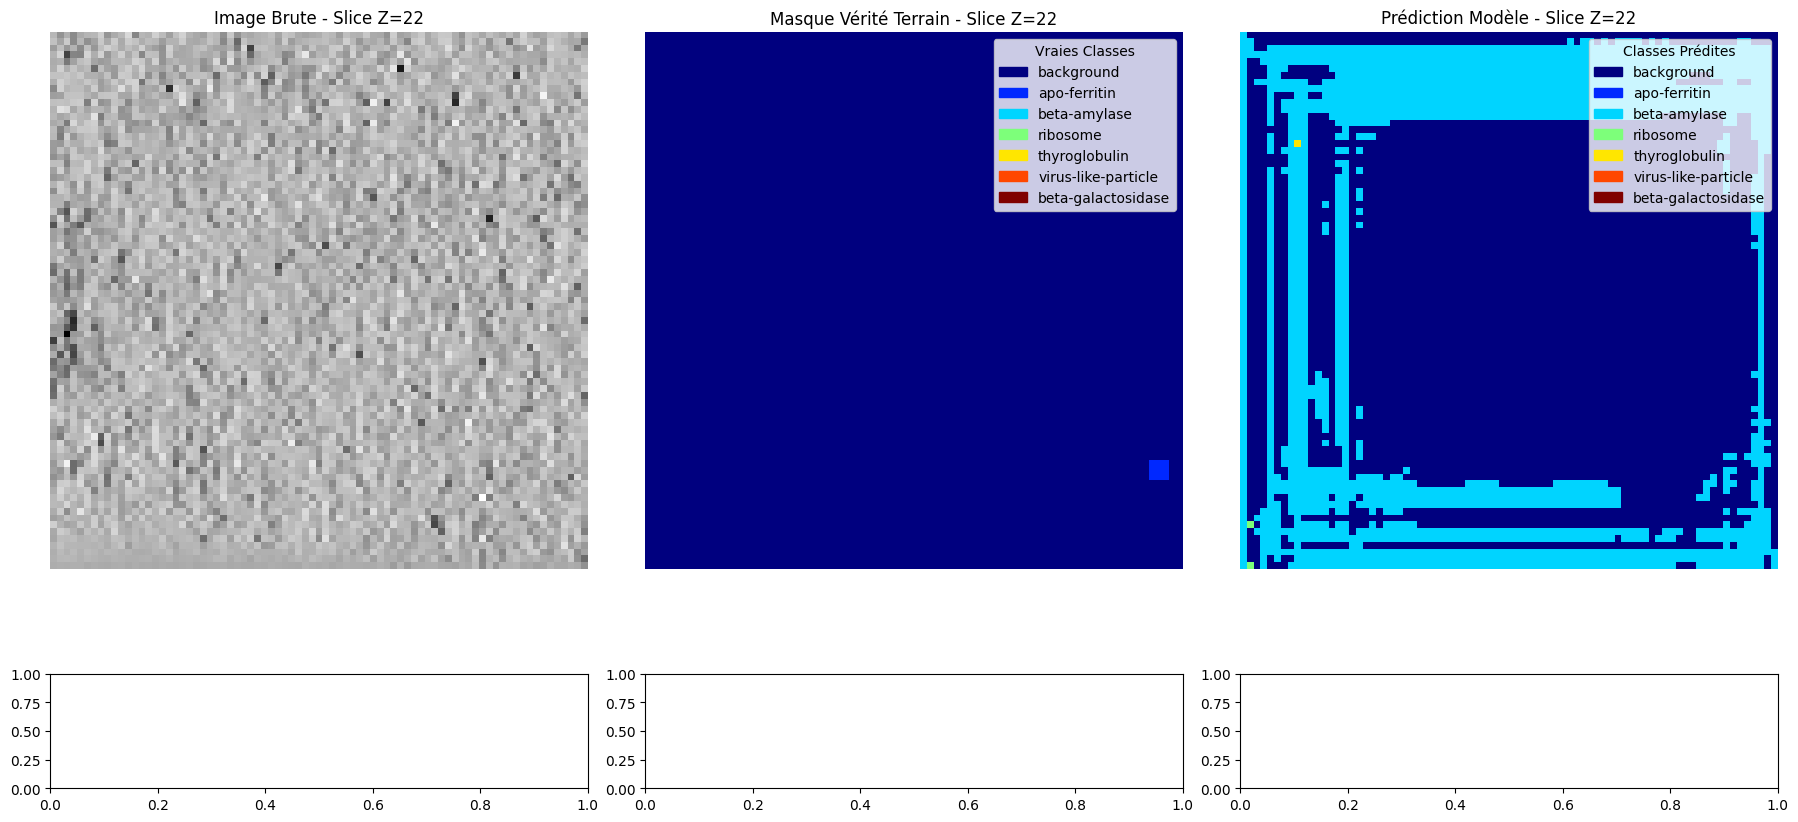

Exemple 2 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


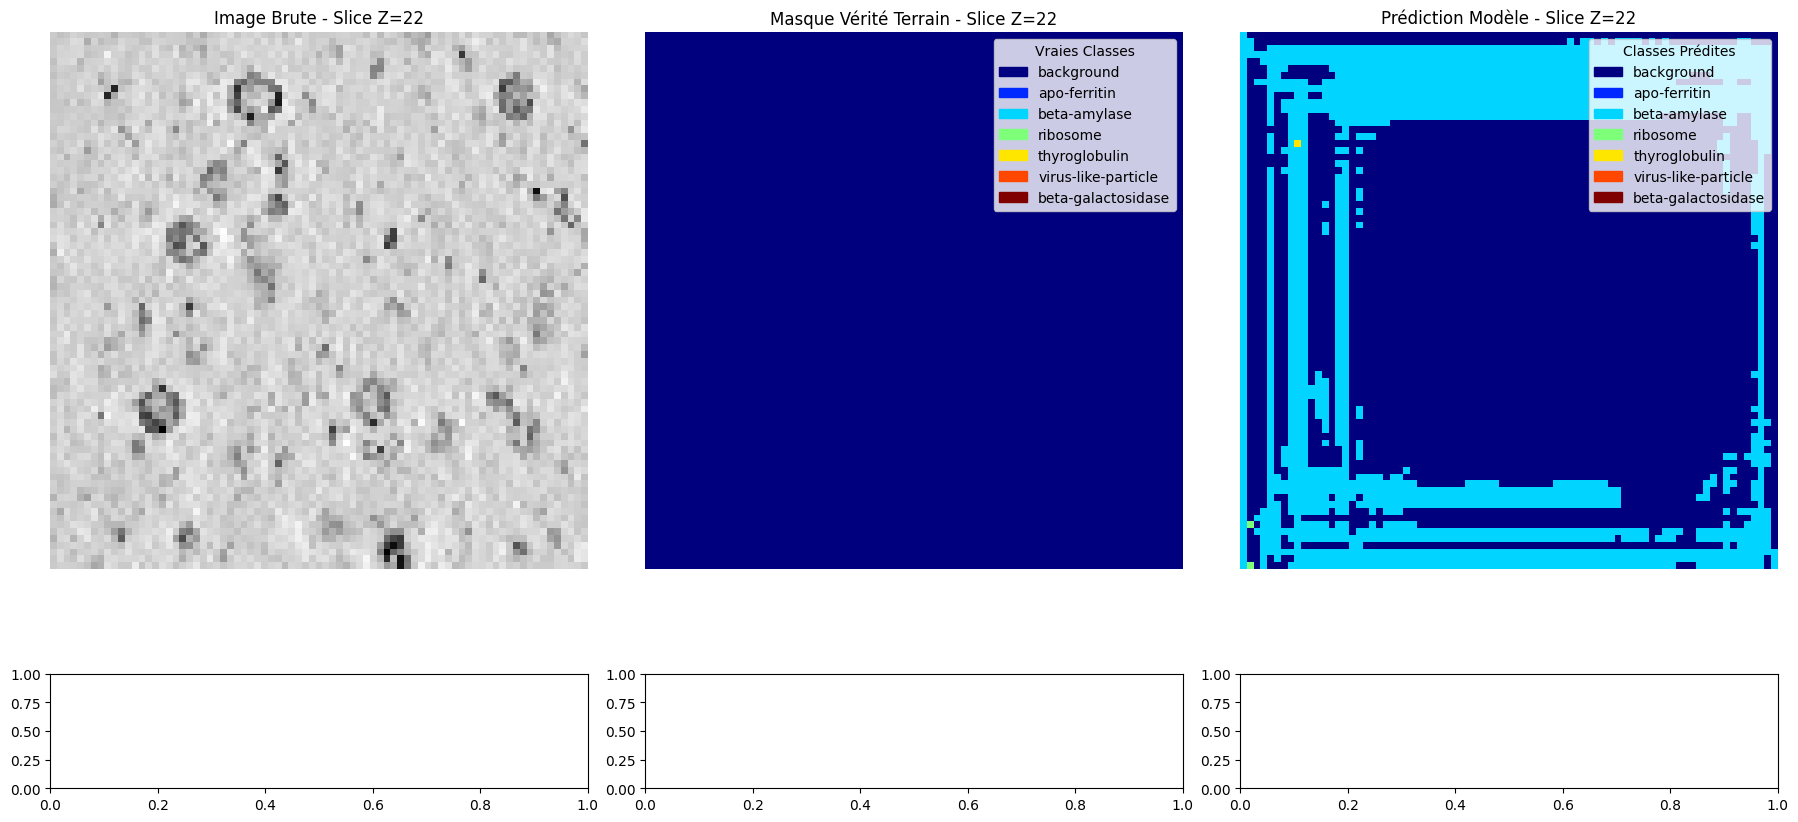

Exemple 3 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


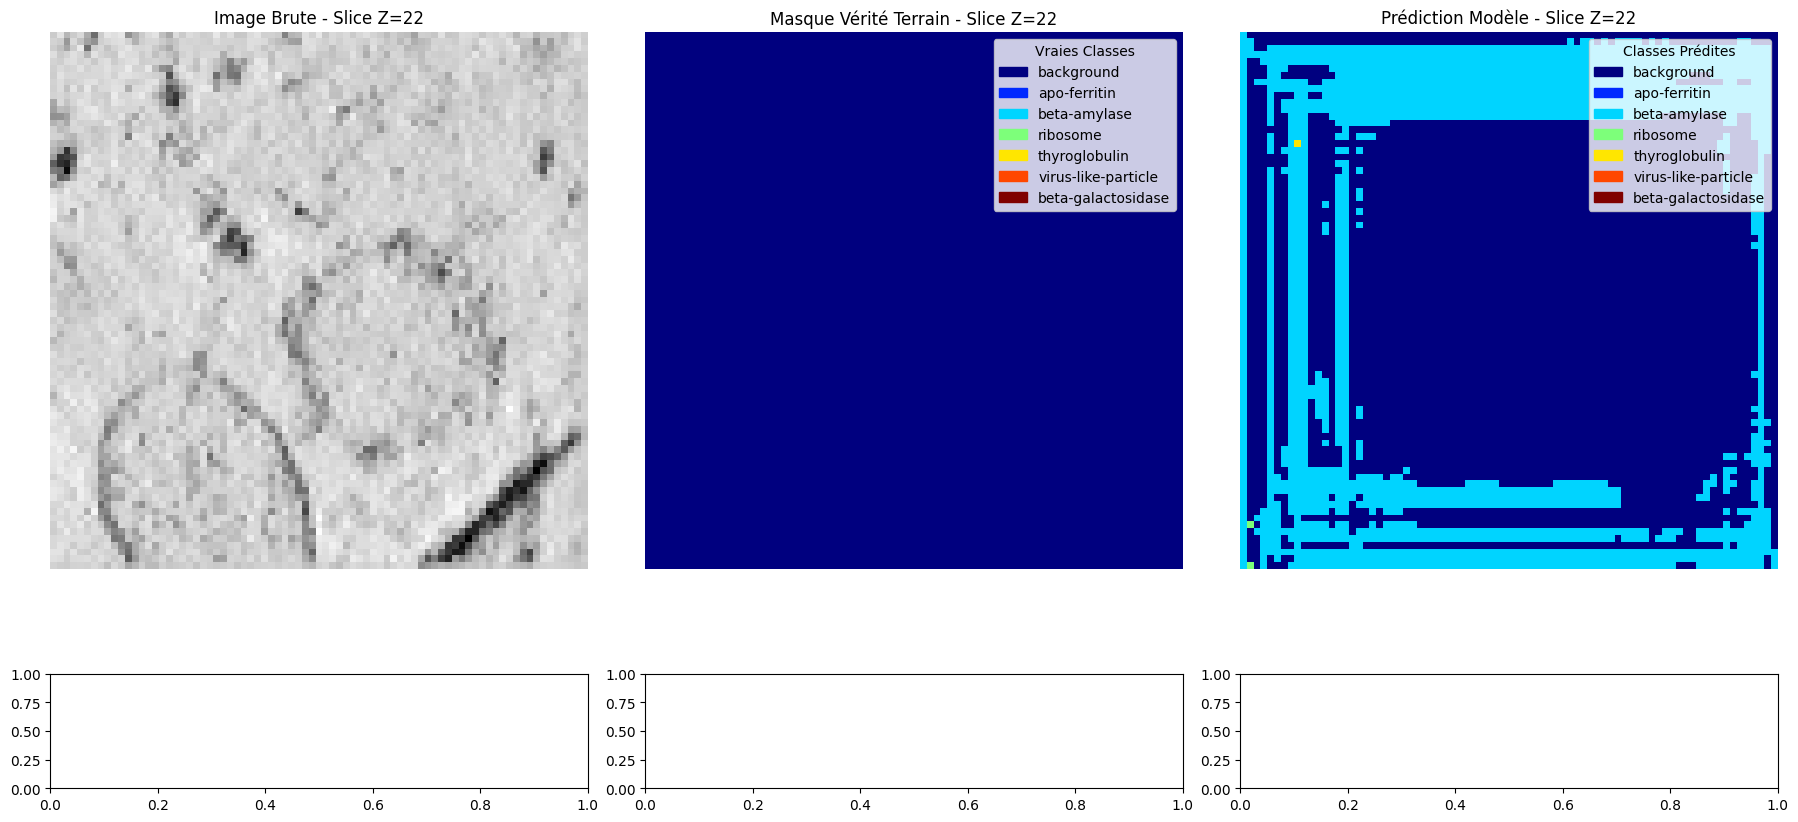

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def display_prediction(x_sample, y_true_classes, y_pred_classes, slice_index=23, cmap_name='jet', class_labels=None):
    # Si aucun mapping n'est fourni, utiliser une correspondance par défaut (les chiffres)
    if class_labels is None:
        raise ValueError("Vous devez fournir un dictionnaire 'class_labels'.")

    # Nombre de classes est automatiquement déterminé depuis 'class_labels'
    n_classes = len(class_labels)
    
    cmap = plt.get_cmap(cmap_name)

    # Création de la figure et des axes
    fig, axs = plt.subplots(2, 3, figsize=(18, 10), gridspec_kw={'height_ratios': [8, 1]})

    # Affichage de l'image brute (slice)
    axs[0, 0].imshow(x_sample[slice_index, :, :, 0], cmap="gray")
    axs[0, 0].set_title(f"Image Brute - Slice Z={slice_index}")
    axs[0, 0].axis("off")

    # Affichage du masque de vérité terrain avec la même colormap
    im1 = axs[0, 1].imshow(y_true_classes[slice_index, :, :], cmap=cmap, vmin=0, vmax=n_classes-1)
    axs[0, 1].set_title(f"Masque Vérité Terrain - Slice Z={slice_index}")
    axs[0, 1].axis("off")

    # Affichage de la prédiction du modèle avec la même colormap
    im2 = axs[0, 2].imshow(y_pred_classes[slice_index, :, :], cmap=cmap, vmin=0, vmax=n_classes-1)
    axs[0, 2].set_title(f"Prédiction Modèle - Slice Z={slice_index}")
    axs[0, 2].axis("off")

    # Création de la légende pour le masque de vérité terrain
    patches_true = []
    for label in range(n_classes):
        color = cmap(label / (n_classes - 1))
        protein_name = class_labels.get(label, str(label))
        patches_true.append(mpatches.Patch(color=color, label=protein_name))

    axs[0, 1].legend(handles=patches_true, loc="upper right", fontsize=10, title="Vraies Classes")

    # Création de la légende pour la prédiction
    patches_pred = []
    for label in range(n_classes):
        color = cmap(label / (n_classes - 1))
        protein_name = class_labels.get(label, str(label))
        patches_pred.append(mpatches.Patch(color=color, label=protein_name))

    axs[0, 2].legend(handles=patches_pred, loc="upper right", fontsize=10, title="Classes Prédites")

    # Ajustement du layout pour éviter les chevauchements
    plt.tight_layout()
    plt.show()


# Mapping des classes vers les noms de protéines
class_labels = {
    0: "background",
    1: "apo-ferritin",
    2: "beta-amylase",
    3: "ribosome",
    4: "thyroglobulin",
    5: "virus-like-particle",
    6: "beta-galactosidase"
}

# Exemple de boucle pour afficher 20 exemples
# On suppose que X_test et Y_test (en one-hot) sont définis et que 'model' est votre modèle entraîné.
# Pour chaque exemple, on convertit Y_test en indices de classes et on réalise une prédiction.

for i in range(len(X_test[:20])):  # Parcours des 20 premiers exemples
    print(f"Exemple {i+1} :")
    x_sample = X_test[i]  # x_sample de forme (D, H, W, 1)
    # Conversion du masque vérité terrain one-hot en indices (shape : (D, H, W))
    y_true_int = np.argmax(Y_test[i], axis=-1)
    
    # Prédiction du modèle pour le patch choisi
    x_sample_expanded = np.expand_dims(x_sample, axis=0)
    y_pred = model.predict(x_sample_expanded)
    y_pred_int = np.argmax(y_pred[0], axis=-1)
    
    # Affichage de la prédiction
    display_prediction(x_sample, y_true_int, y_pred_int, slice_index=22, class_labels=class_labels)


In [37]:
import numpy as np

def compute_iou(y_true, y_pred, class_id):
    """
    Calcule l'IoU pour une classe donnée (class_id) entre le masque vérité terrain et la prédiction.
    """
    true_class = (y_true == class_id)
    pred_class = (y_pred == class_id)
    intersection = np.logical_and(true_class, pred_class).sum()
    union = np.logical_or(true_class, pred_class).sum()
    # Si la classe n'est présente ni dans y_true ni dans y_pred, on retourne NaN pour ne pas fausser la moyenne.
    if union == 0:
        return np.nan
    return intersection / union

# Initialisation des dictionnaires pour accumuler les métriques pour chaque protéine (hors fond, class 0)
protein_ious = {cls: [] for cls in class_labels if cls != 0}
protein_detection_counts = {cls: 0 for cls in class_labels if cls != 0}

n_samples = len(X_test)

for i in range(n_samples):
    # Extraction du patch et conversion du masque de vérité en indices de classes
    x_sample = X_test[i]                      # forme (D, H, W, 1)
    y_true_onehot = Y_test[i]                 # forme (D, H, W, n_classes)
    y_true = np.argmax(y_true_onehot, axis=-1)  # forme (D, H, W)

    # Prédiction pour le patch
    x_sample_expanded = np.expand_dims(x_sample, axis=0)
    y_pred_prob = model.predict(x_sample_expanded)
    y_pred = np.argmax(y_pred_prob[0], axis=-1) # forme (D, H, W)
    
    # Pour chaque protéine (classes > 0), calcul de l'IoU et comptage de la détection
    for cls in protein_ious:
        iou = compute_iou(y_true, y_pred, cls)
        if not np.isnan(iou):
            protein_ious[cls].append(iou)
        # Comptage : on considère que la protéine est détectée si au moins un voxel prédit correspond à la classe
        if (y_pred == cls).sum() > 0:
            protein_detection_counts[cls] += 1

# Calcul des moyennes d'IoU pour chaque protéine
avg_iou = {cls: np.nanmean(protein_ious[cls]) if len(protein_ious[cls]) > 0 else np.nan 
           for cls in protein_ious}
# Calcul de la fréquence de détection (en pourcentage)
detection_freq = {cls: (protein_detection_counts[cls] / n_samples) * 100 
                  for cls in protein_detection_counts}

print("Moyenne IoU par protéine :")
for cls in avg_iou:
    print(f"{class_labels[cls]}: {avg_iou[cls]:.3f}")

print("\nFréquence de détection par protéine (pourcentage d'images où la protéine est détectée) :")
for cls in detection_freq:
    print(f"{class_labels[cls]}: {detection_freq[cls]:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Moyenne IoU par protéine :
apo-ferritin: 0.000
beta-amylase: 0.000
ribosome: 0.000
thyroglobulin: 0.000
virus-like-particle: 0.000
beta-galactosidase: nan

Fréquence de détection par protéine (pourcentage d'images où la protéine est détectée) :
apo-ferritin: 100.00%
beta-amylase: 100.00%
ribosome: 100.00%
thyroglobulin: 100.00%
virus-like-particle: 100.00%
beta-galactosidase: 0.00%


In [38]:
# def display_patch_napari(x_sample, y_true_classes, y_pred_classes):
#     """
#     Affiche un patch 3D dans Napari avec l'image brute, le masque réel et la prédiction du modèle.
#     """
#     import napari

#     # Supposons que x_sample a la forme (23, 79, 79, 1), donc 23 slices de 79x79 pixels avec 1 canal.
#     # Nous devons supprimer la dernière dimension (le canal) pour en faire un volume 3D de forme (23, 79, 79)
#     x_sample = x_sample.squeeze(axis=-1)  # Forme (23, 79, 79)

#     # y_true_classes et y_pred_classes ont déjà la forme (23, 79, 79), donc pas besoin de squeeze ici
#     # Si y_true_classes et y_pred_classes sont déjà de forme (23, 79, 79), vous pouvez les passer directement

#     # Créer une nouvelle instance Napari
#     viewer = napari.Viewer()

#     # Ajouter l'image brute (tomogramme 3D)
#     viewer.add_image(x_sample, name='Image brute', colormap='gray', opacity=1)

#     # Ajouter le masque de vérité terrain (comme des labels)
#     viewer.add_labels(y_true_classes, name='Masque Vérité Terrain', opacity=0.5)

#     # Ajouter la prédiction du modèle (comme des labels)
#     viewer.add_labels(y_pred_classes, name='Prédiction Modèle', opacity=0.5)

#     # Exécuter Napari
#     viewer.show()

# # Afficher le patch dans Napari
# display_patch_napari(x_sample, y_true_classes, y_pred_classes)
